# 🍷 Анализ рынка вина: что влияет на цену и рейтинг?

## Описание проекта 
Анализ рынка вина для выявления ключевых факторов, влияющих на цену и рейтинг продукции. Исследование включает сравнительный анализ традиционных винодельческих регионов (Старый Свет) и новых рынков (Новый Свет).

**Источник данных:** [Kaggle - Wine Reviews](https://www.kaggle.com/datasets/zynicide/wine-reviews)

## Задачи раздела Исследовательский анализ данных:
- Провести разведочный анализ данных (EDA)
- Выявить значимые признаки для рейтинга вина
- Выявить самые популярные и дорогие сорта вин

Общая статистика и распределения

Географические паттерны

Сорта и типы вин + цветовая классификация

Эксперты и рейтинги

Ценовой анализ и сегменты

Кросс-анализ и инсайты

!!! надо ли их писать или сразу делать? 

Исследовательский анализ данных включает в себя выполнение следующих этапов:  
* оценить экспертов
* Найти популярные сорта по регионам.
* Выбрать сорта вина с наибольшей стоимостью. Для каждого региона найти среднюю цену вина.
* Определить популярные сорта вина в бюджетном сегменте.
* Определить, какие сорта вина лидируют по рейтингам. 
* Построить график «ящик с усами» по рейтингам, выполнив категоризацию по странам, по сортам вина.
* Выявить закономерность влияния  рейтинга вина на его цену. Построить диаграмму рассеяния и посчитать корреляцию. 

## Оглавление

1. Общая статистика и распределения
2. Анализ географического распределения  

---

## Описание данных
Набор данных состоит из 13 признаков (2 числовых и 11 категориальных):

| Признак | Тип | Описание | Заполненность |
|---------|-----|----------|---------------|
| `country` | Категориальный | Страна происхождения вина | 100% |
| `description` | Текстовый | Описание вкусового профиля вина | 100% |
| `designation` | Категориальный | Виноградник происхождения ягод | 100% |
| `points` | Числовой | Оценка вина по шкале от 80 до 100 | 100% |
| `price` | Числовой | Стоимость одной бутылки (у.е.) | 100% |
| `province` | Категориальный | Регион производства (провинция/штат) | 100% |
| `region_1` | Категориальный | Винодельческая область в провинции | 100% |
| `taster_name` | Текстовый | Имя автора рецензии | 79.2% |
| `taster_twitter_handle` | Текстовый | Твиттер-аккаунт рецензента | 75.5% |
| `title` | Текстовый | Полное название вина | 100% |
| `variety` | Категориальный | Сорт винограда | 100% |
| `winery` | Категориальный | Винодельня-производитель | 100% |
| `continent` | Категориальный | Континент происхождения | 100% |
| `color` | Категориальный | Цвет вина (5 категорий) | 100% |
| `year` | Числовой | Год производства вина | 96.4% |
| `wine_age` | Числовой | Возраст вина на момент обзора | 96.4% |
| `age_category` | Категориальный | Категория выдержки вина | 96.4% |

## 0. Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white', palette='rocket', color_codes=True)
import squarify

from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

Загружаем данные, подготовленные и сохранённые в 01_Data_Preprocessing.ipynb в формате *.csv

In [2]:
df = pd.read_csv('../data/wine_reviews_cleaned.csv')
df.sample(2)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,continent,color,year,wine_age,age_category
51142,Portugal,A caramel aroma is followed by sweet strawberr...,Unknown,84,12.0,Tejo,Tejo,Roger Voss,@vossroger,Quinta da Alorna 2011 Rosé (Tejo),Rosé,Quinta da Alorna,Europe,rose,2011.0,6.0,Выдержанное
54226,France,Made in a similar fashion to Sherry with a sol...,Estela Solera,90,35.0,France Other,Vin de Liqueur,Roger Voss,@vossroger,Lionel Osmin & Cie 2010 Estela Solera Malbec-M...,Malbec-Merlot,Lionel Osmin & Cie,Europe,red,2010.0,7.0,Выдержанное


## 1. Матрица корреляции

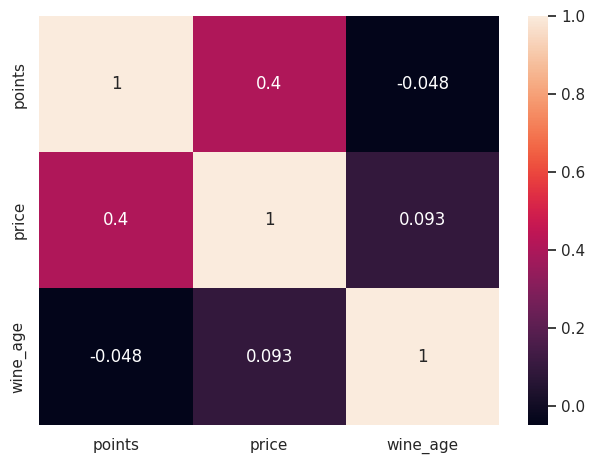

In [3]:
sns.heatmap(df[['points', 'price', 'wine_age']].corr(), annot=True)
plt.tight_layout() 
plt.show()

In [4]:
def interpret_correlation(value, feature1, feature2):
    abs_value = abs(value)
    if abs_value >= 0.7:
        strength = 'сильная'
    elif abs_value >= 0.5:
        strength = 'умеренная' 
    elif abs_value >= 0.3:
        strength = 'слабая'
    else:
        strength = 'очень слабая'
    
    direction = 'положительная' if value > 0 else 'отрицательная'
    
    return f'{strength} {direction} связь'

corr = df[['points', 'price', 'wine_age']].corr()

features = [
    ('price', 'points', 'Цена', 'Рейтинг'),
    ('wine_age', 'points', 'Возраст', 'Рейтинг'), 
    ('wine_age', 'price', 'Возраст', 'Цена')
]

for feat1, feat2, name1, name2 in features:
    corr_value = corr.loc[feat1, feat2]
    interpretation = interpret_correlation(corr_value, name1, name2)
    
    print(f'{name1} ↔ {name2}: r = {corr_value:.3f}')
    print(f'   - {interpretation}')

Цена ↔ Рейтинг: r = 0.404
   - слабая положительная связь
Возраст ↔ Рейтинг: r = -0.048
   - очень слабая отрицательная связь
Возраст ↔ Цена: r = 0.093
   - очень слабая положительная связь


## 2. Матрица диаграмм рассеяния

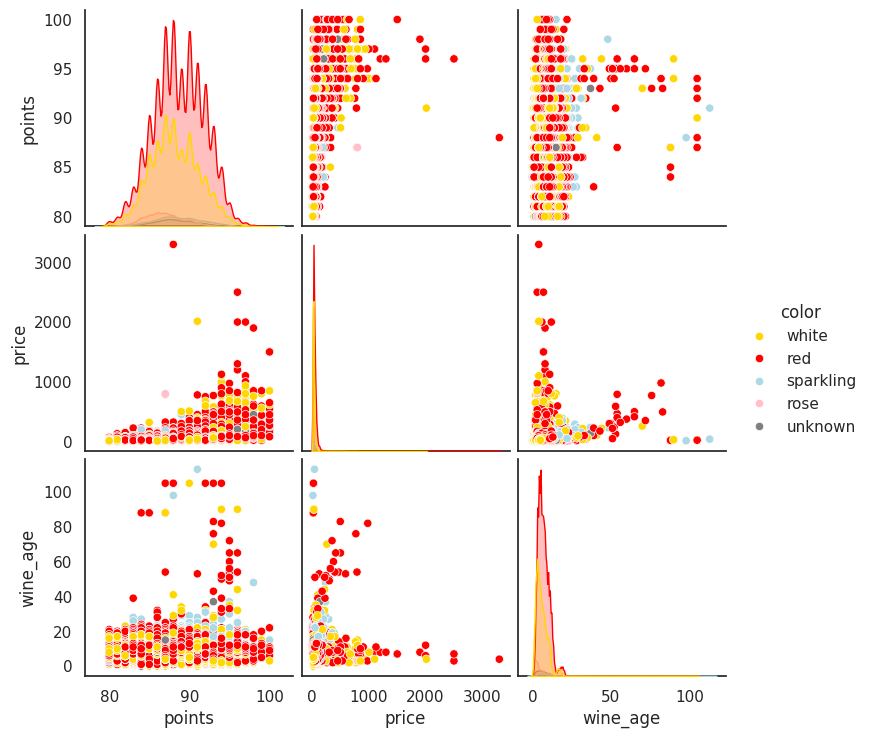

In [5]:
sns.pairplot(df[['points', 'price', 'wine_age', 'color']], 
             hue='color', 
             palette={'red': 'red', 'white': 'gold', 'rose': 'pink', 
                     'sparkling': 'lightblue', 'unknown': 'gray'})
plt.show()

   - Возрастная структура: экспоненциальное распределение с преобладанием молодых вин
   - Ценовое распределение: полимодальное с концентрацией в низком ценовом сегменте
   - Линейные зависимости: слабо выражены визуально
   - Группировка данных: отсутствует четкая кластеризация по цветовым категориям
   - Сбалансированность: удовлетворительная по цвету вина
   - По стоимости есть много выбросов, большая скученность данных. Создаем логарифмированную цену (Разница в 1 единицу = цена отличается в ~2.7 раза)

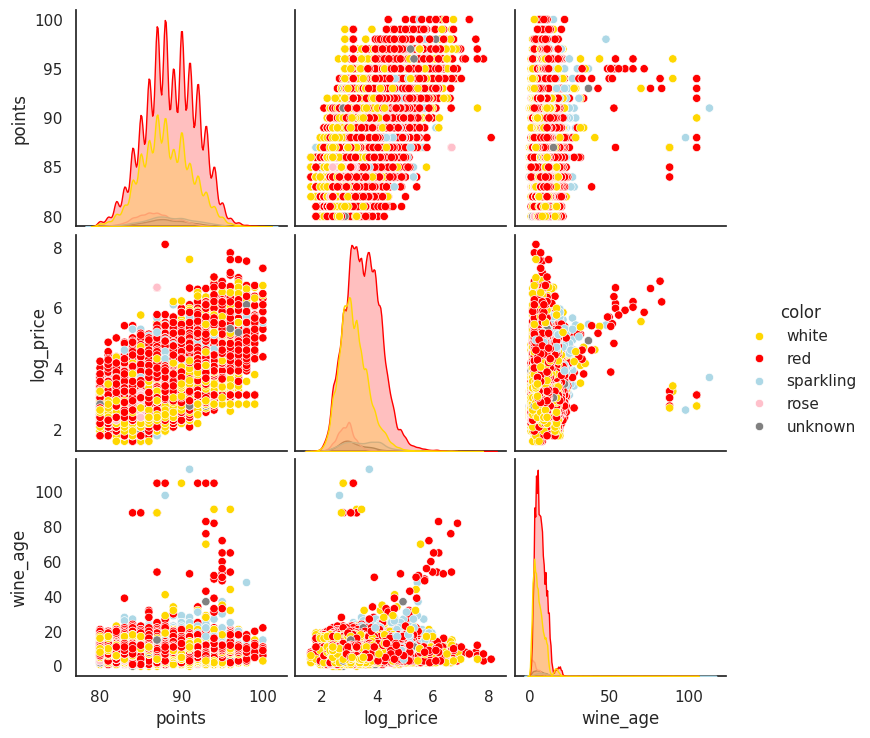

In [6]:
df['log_price'] = np.log1p(df['price'])

sns.pairplot(df[['points', 'log_price', 'wine_age', 'color']], 
             hue='color',
             palette={'red': 'red', 'white': 'gold', 'rose': 'pink', 
                     'sparkling': 'lightblue', 'unknown': 'gray'})

In [7]:
color_log_means = df.groupby('color')['log_price'].mean()
print('Средние log_price по цветам:')
for color, log_mean in color_log_means.items():
    actual_price = np.expm1(log_mean)
    print(f'- {color}: log_price = {log_mean:.2f} → примерно у.е.{actual_price:.0f}')

Средние log_price по цветам:
- red: log_price = 3.48 → примерно у.е.32
- rose: log_price = 2.90 → примерно у.е.17
- sparkling: log_price = 3.53 → примерно у.е.33
- unknown: log_price = 3.16 → примерно у.е.22
- white: log_price = 3.16 → примерно у.е.23


- Красные вина имеют более высокий log_price, что соответствует их премиальному позиционированию
- Розовые вина сосредоточены в области низких log_price, подтверждая их бюджетный статус
- Линейная зависимость между points и log_price стала более выраженной

## 2. Анализ географического распределения  

* География, общая статистика

In [8]:
print(f'• Всего стран: {df['country'].nunique()}')
print(f'• Всего континентов: {df['continent'].nunique()}')
print(f'• Всего регионов/провинций: {df['province'].nunique()}')
print(f'• Всего винодельческих областей: {df['region_1'].nunique()}')

• Всего стран: 43
• Всего континентов: 6
• Всего регионов/провинций: 425
• Всего винодельческих областей: 1601


* Распределение по континентам

In [9]:
continent_stats = df.groupby('continent').agg({
    'country': 'nunique',
    'points': 'mean',
    'price': 'mean',
    'variety': 'nunique'
}).round(2).sort_values('country', ascending=False)

print(continent_stats)

               country  points  price  variety
continent                                     
Europe              24   88.62  36.18      563
Asia                 6   88.38  30.39       63
Latin America        6   86.52  22.60      106
Africa               3   88.04  24.46       59
North America        2   88.56  36.67      258
Oceania              2   88.47  32.32       72


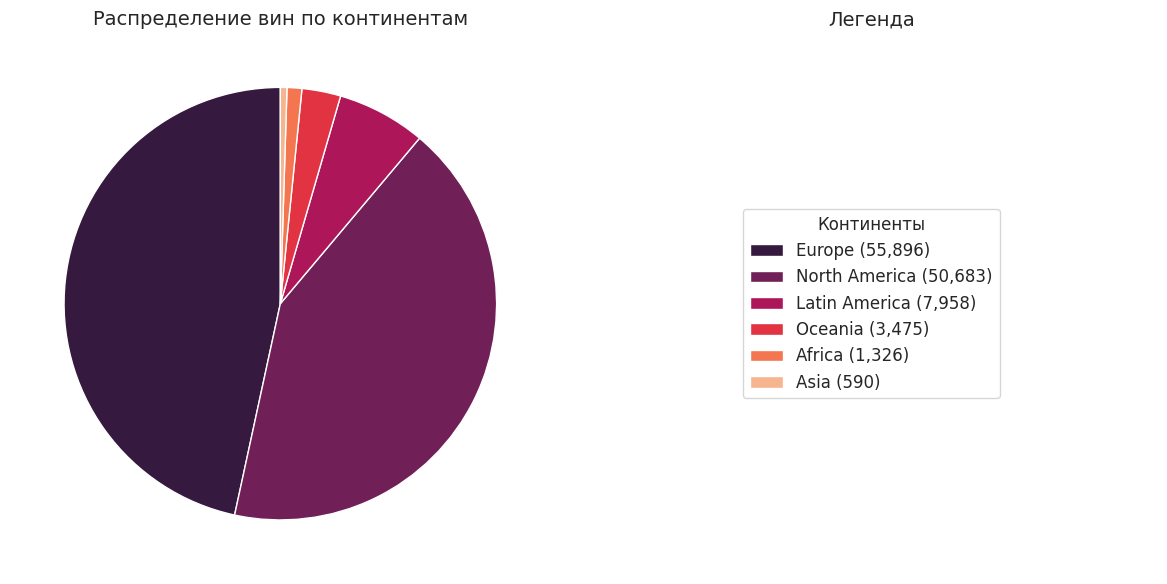

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
continent_data = df['continent'].value_counts()
patches, texts = plt.pie(continent_data.values,
                        labels=None, 
                        autopct=None,
                        startangle=90)
plt.title('Распределение вин по континентам', fontsize=14)

plt.subplot(1, 2, 2)
plt.axis('off') 
legend_labels = [f'{continent} ({count:,})' for continent, count in continent_data.items()]
plt.legend(patches, legend_labels, 
          title='Континенты', 
          loc='center', 
          frameon=True,
          fontsize=12)
plt.title('Легенда', fontsize=14)

plt.tight_layout()
plt.show()

* Цвета вин по континентам

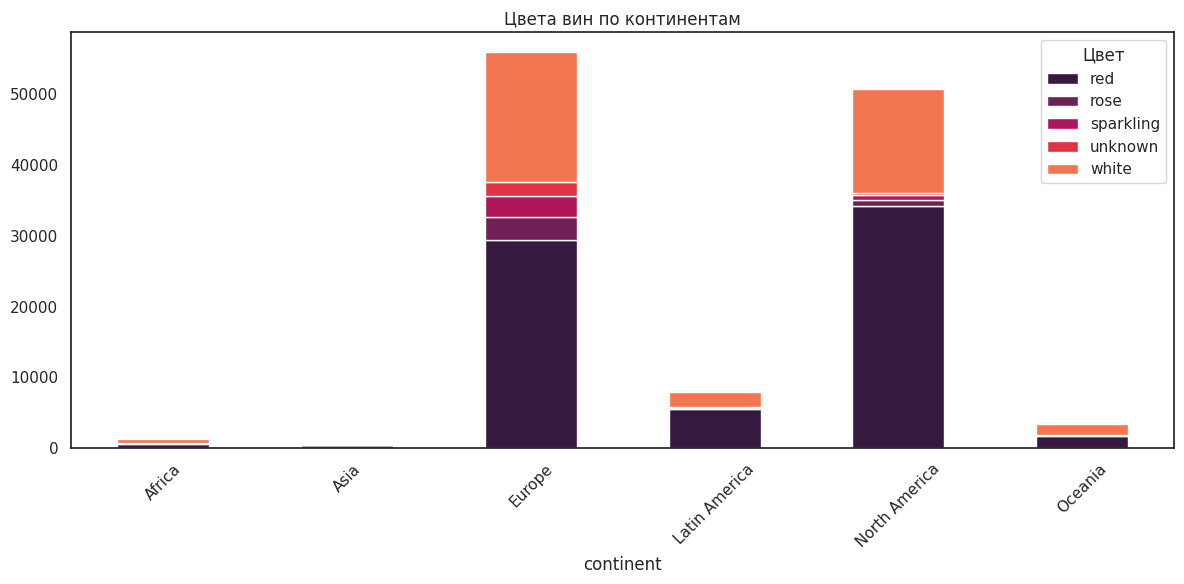

In [11]:
color_by_continent = pd.crosstab(df['continent'], df['color'])
color_by_continent.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Цвета вин по континентам')
plt.xticks(rotation=45)
plt.legend(title='Цвет')
plt.tight_layout()
plt.show()

* Treemap: распределение вин по странам
  подвыборка для скорости 10K записей

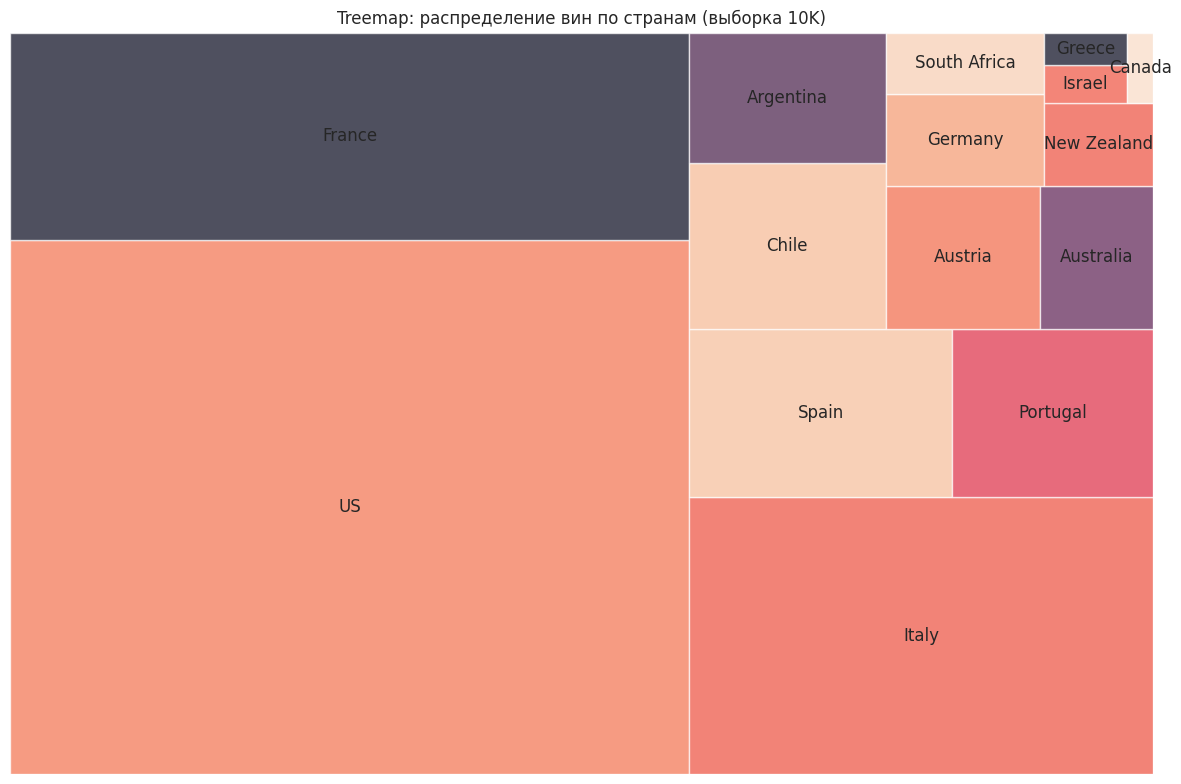

In [12]:
sample_df = df.sample(10000, random_state=26)
country_counts = sample_df['country'].value_counts().head(15)

plt.figure(figsize=(12, 8))
squarify.plot(sizes=country_counts.values, 
              label=country_counts.index, 
              alpha=0.7)
plt.title('Treemap: распределение вин по странам (выборка 10K)')
plt.axis('off')
plt.tight_layout()
plt.show()

* Топ-10 стран по количеству записей

In [13]:
top_countries = df['country'].value_counts().head(10)
print(f'🏆 ТОП-10 СТРАН ПО КОЛИЧЕСТВУ ВИН:')
for i, (country, count) in enumerate(top_countries.items(), 1):
    percentage = (count / len(df)) * 100
    print(f'{i}. {country}: {count:,} вин ({percentage:.1f}%)')

🏆 ТОП-10 СТРАН ПО КОЛИЧЕСТВУ ВИН:
1. US: 50,457 вин (42.1%)
2. France: 20,353 вин (17.0%)
3. Italy: 17,940 вин (15.0%)
4. Spain: 6,116 вин (5.1%)
5. Portugal: 5,256 вин (4.4%)
6. Chile: 4,183 вин (3.5%)
7. Argentina: 3,544 вин (3.0%)
8. Austria: 3,034 вин (2.5%)
9. Australia: 2,197 вин (1.8%)
10. Germany: 1,992 вин (1.7%)


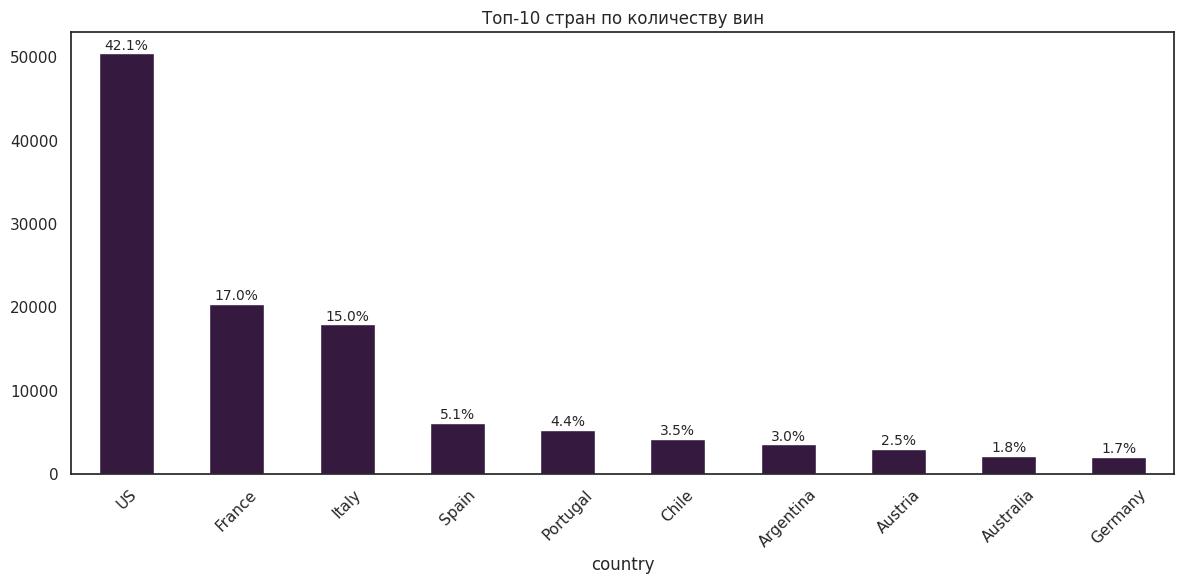

In [14]:
plt.figure(figsize=(12, 6))

top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar')

plt.title('Топ-10 стран по количеству вин')
plt.xticks(rotation=45)

total_wines = len(df)
for i, count in enumerate(top_countries.values):
    percentage = (count / total_wines) * 100
    plt.text(i, count + 100, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

* Доминирующие страны/регионы

In [15]:
total_wines = len(df)
cumulative_percentage = 0
print('80/20')
for i, (country, count) in enumerate(df['country'].value_counts().items(), 1):
    percentage = (count / total_wines) * 100
    cumulative_percentage += percentage
    print(f'{i}. {country}: {percentage:.1f}% (сумма: {cumulative_percentage:.1f}%)')
    if cumulative_percentage >= 80: 
        print(f'⭐ 80% данных покрывают {i} стран')
        break

80/20
1. US: 42.1% (сумма: 42.1%)
2. France: 17.0% (сумма: 59.0%)
3. Italy: 15.0% (сумма: 74.0%)
4. Spain: 5.1% (сумма: 79.1%)
5. Portugal: 4.4% (сумма: 83.5%)
⭐ 80% данных покрывают 5 стран


* Анализ для топ-3 стран

In [16]:
top_3_countries = df['country'].value_counts().head(3).index
for country in top_3_countries:
    country_data = df[df['country'] == country]
    print(f'\n📌 {country}:')
    print(f'   • Регионов: {country_data['province'].nunique()}')
    print(f'   • Винодельческих областей: {country_data['region_1'].nunique()}')
    
    print(f'   Топ-3 региона по количеству вин:')
    top_regions = country_data['province'].value_counts().head(3)
    for region, count in top_regions.items():
        percentage = (count / len(country_data)) * 100
        print(f'      • {region}: {count} вин ({percentage:.1f}%)')


📌 US:
   • Регионов: 27
   • Винодельческих областей: 266
   Топ-3 региона по количеству вин:
      • California: 33656 вин (66.7%)
      • Washington: 7965 вин (15.8%)
      • Oregon: 4929 вин (9.8%)

📌 France:
   • Регионов: 11
   • Винодельческих областей: 392
   Топ-3 региона по количеству вин:
      • Bordeaux: 5556 вин (27.3%)
      • Burgundy: 3683 вин (18.1%)
      • Alsace: 2219 вин (10.9%)

📌 Italy:
   • Регионов: 10
   • Винодельческих областей: 384
   Топ-3 региона по количеству вин:
      • Tuscany: 5391 вин (30.1%)
      • Piedmont: 3441 вин (19.2%)
      • Veneto: 2501 вин (13.9%)


## 3. Сорта и типы вин

* Топ-10 популярных сортов винограда

In [17]:
variety_stats = df['variety'].value_counts().head(10)
for category, count in variety_stats.items():
    percentage = (count / len(df)) * 100
    print(f'- {category}: {count:,} вин ({percentage:.2f}%)')

- Pinot Noir: 12,275 вин (10.24%)
- Chardonnay: 10,865 вин (9.06%)
- Cabernet Sauvignon: 8,838 вин (7.37%)
- Red Blend: 8,233 вин (6.86%)
- Bordeaux-style Red Blend: 6,471 вин (5.40%)
- Riesling: 4,772 вин (3.98%)
- Sauvignon Blanc: 4,571 вин (3.81%)
- Syrah: 3,828 вин (3.19%)
- Rosé: 3,219 вин (2.68%)
- Merlot: 2,895 вин (2.41%)


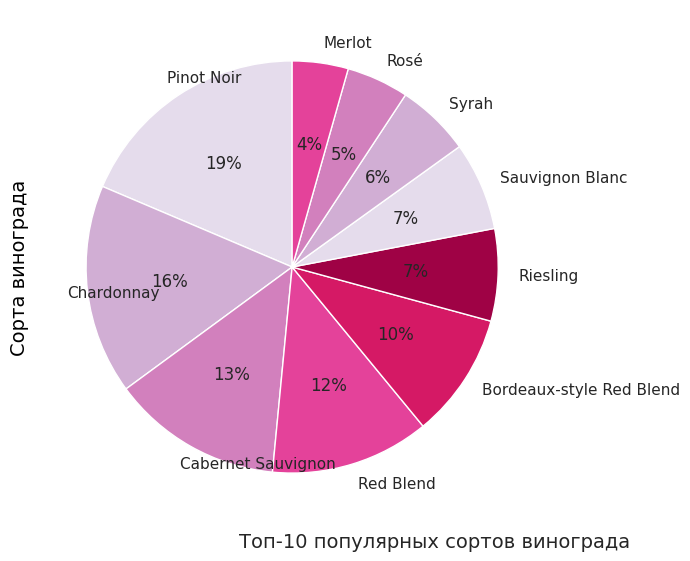

In [18]:
colors = sns.color_palette('PuRd')
variety_stats.plot(
    kind='pie', figsize=[7, 7], colors=colors,
    autopct='%.0f%%',
    counterclock=True, startangle=90,
    center=(1.1, 0))
plt.ylabel('Сорта винограда', fontsize=14, color='k')
plt.figtext(
    0.35, 0.1,
    'Топ-10 популярных сортов винограда',
    fontsize=14)
plt.tight_layout() 
plt.show()

* Распределение цвета по набору данных

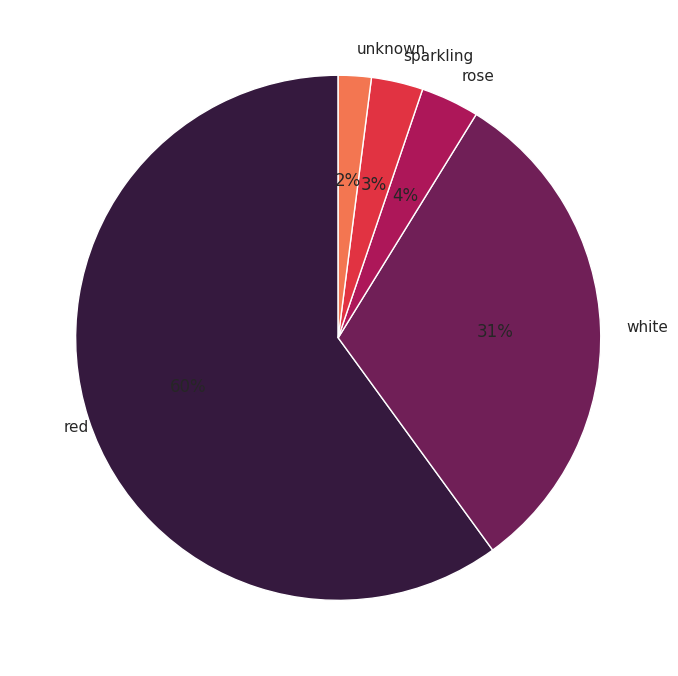

In [19]:
df['color'].value_counts().head(10).plot(
    kind='pie', figsize=[7, 7], 
    autopct='%.0f%%',
    counterclock=True, startangle=90,
    center=(1.1, 0))
plt.ylabel('')
plt.tight_layout() 
plt.show()

* Топ-10 сортов винограда по цвету вина

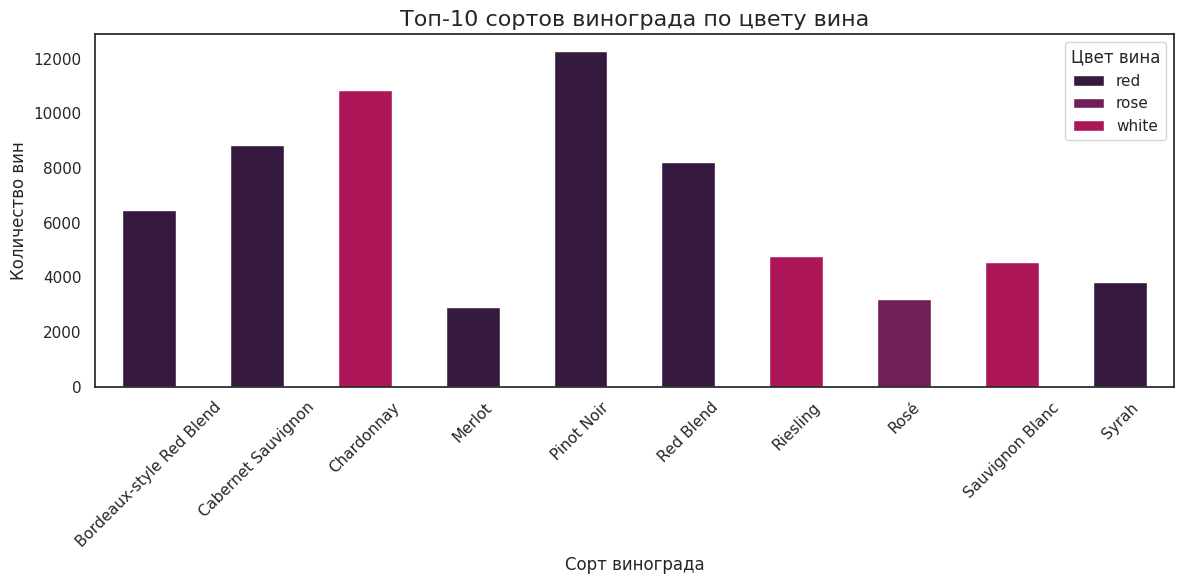

In [20]:
df_top = df[df['variety'].isin(variety_stats.index)]

variety_color_counts = df_top.groupby(['variety', 'color']).size().unstack(fill_value=0)
variety_color_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Топ-10 сортов винограда по цвету вина', fontsize=16)
plt.xlabel('Сорт винограда', fontsize=12)
plt.ylabel('Количество вин', fontsize=12)
plt.legend(title='Цвет вина')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4 Анализ возрастных характеристик вина

* Общая статистика по возрасту

In [21]:
print(f'Всего вин с известным возрастом: {df['wine_age'].notna().sum():,}')
print(f'Средний возраст: {df['wine_age'].mean():.1f} лет')
print(f'Медианный возраст: {df['wine_age'].median():.1f} лет')
print(f'Самый молодой: {df['wine_age'].min():.0f} лет')
print(f'Самый старый: {df['wine_age'].max():.0f} лет')

Всего вин с известным возрастом: 115,645
Средний возраст: 6.4 лет
Медианный возраст: 6.0 лет
Самый молодой: 0 лет
Самый старый: 113 лет


* Распределение данных по возрастным категориям:

In [22]:
age_stats = df['age_category'].value_counts().sort_index()
for category, count in age_stats.items():
    percentage = (count / len(df)) * 100
    print(f'- {category}: {count:,} вин ({percentage:.2f}%)')

- Антиквар: 34 вин (0.03%)
- Винтаж: 203 вин (0.17%)
- Выдержанное: 74,539 вин (62.15%)
- Зрелое: 14,623 вин (12.19%)
- Молодое: 26,235 вин (21.88%)


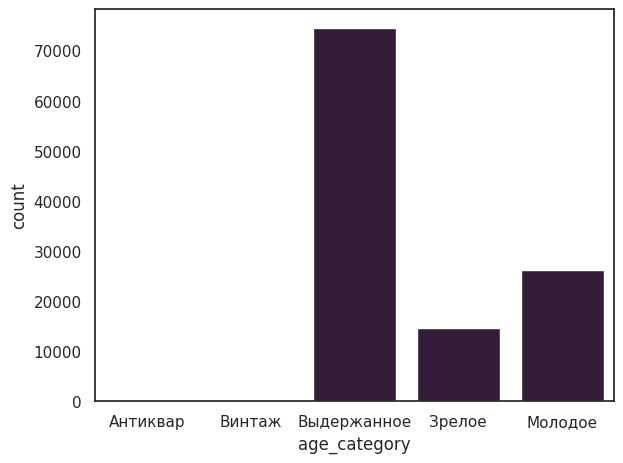

In [23]:
sns.barplot(age_stats)
plt.tight_layout()
plt.show()

* Разбивка количества записей по декадам

In [24]:
df['decade'] = (df['year'] // 10) * 10
df.groupby('decade').agg({
    'price': 'mean',
    'points': 'mean',
    'year': 'count'
}).sort_index()

,price,points,year
decade,,,
1900.0,40.000000,91.000000,1
1910.0,19.125000,89.875000,8
1920.0,21.750000,88.125000,8
1930.0,737.500000,93.500000,2
1940.0,459.333333,93.666667,3
1950.0,429.666667,95.333333,3
1960.0,335.666667,94.166667,12
1970.0,164.200000,90.800000,5
1980.0,112.333333,90.814815,27


## 5 Сегментация цен на вино

### Базовый анализ распределения

In [25]:
df.price.describe()

count    119928.000000
mean         35.215521
std          40.840919
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [26]:
print(f'• Средняя цена: {df['price'].mean():.1f} у.е. (медиана: {df['price'].median():.1f} у.е.) → сильный перекос вправо')
print(f'• 50% вин стоят до {df['price'].median():.0f} у.е.')
print(f'• 75% вин стоят до {df['price'].quantile(0.75):.0f} у.е.') 
print(f'• Разброс цен огромен: от {df['price'].min():.0f} у.е. до {df['price'].max():.0f} у.е.')
print(f'• Стандартное отклонение {df['price'].std():.1f} у.е. > среднего значения → высокая вариативность')

• Средняя цена: 35.2 у.е. (медиана: 25.0 у.е.) → сильный перекос вправо
• 50% вин стоят до 25 у.е.
• 75% вин стоят до 42 у.е.
• Разброс цен огромен: от 4 у.е. до 3300 у.е.
• Стандартное отклонение 40.8 у.е. > среднего значения → высокая вариативность


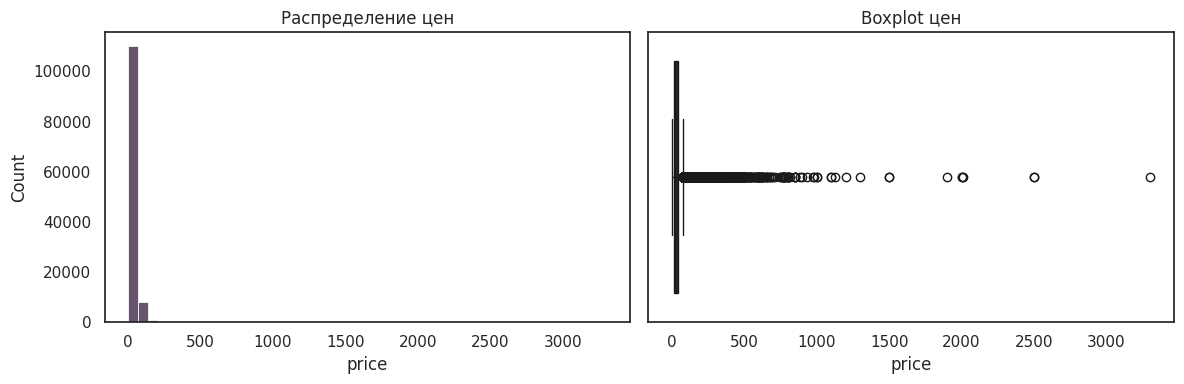

In [27]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50)
plt.title('Распределение цен')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'])
plt.title('Boxplot цен')
plt.tight_layout()
plt.show()

* Анализ экстремальных значений

In [28]:
print(f'• 95-й перцентиль: у.е.{df['price'].quantile(0.95):.0f}')
print(f'• 99-й перцентиль: у.е.{df['price'].quantile(0.99):.0f}')
print(f'• Вин дороже у.е.100: {(df['price'] > 100).sum()} ({(df['price'] > 100).sum()/len(df)*100:.1f}%)')
print(f'• Вин дороже у.е.500: {(df['price'] > 500).sum()} ({(df['price'] > 500).sum()/len(df)*100:.1f}%)')

• 95-й перцентиль: у.е.82
• 99-й перцентиль: у.е.150
• Вин дороже у.е.100: 3234 (2.7%)
• Вин дороже у.е.500: 91 (0.1%)


Для такой выраженной ассиметрии данных использую подходы:

- **Сегментация**: на основе исходных цен для бизнес-интерпретации
- **Визуализация**: цены с логарифмированием для лучшего отображения паттернов

### Метод сегментации цен

**Гибридный подход, сочетающий статистические и бизнес-ориентированные границы:**

- **Статистические сегменты** (по квартилям):
  - Бюджет (0-17 у.е.) - 25% самых дешевых вин
  - Средний- (17-25 у.е.) - следующие 25%  
  - Средний+ (25-42 у.е.) - следующие 25%
  - Премиум (42-76у.е.) - охватывает до 87-го перцентиля

- **Бизнес-сегменты** (ручные границы):
  - Люкс (76-150) - премиальный сегмент
  - Ультра-люкс (150-3300) - эксклюзивные вина

In [29]:
df['price_segment'] = pd.cut(df['price'], 
                           bins=[0, 17, 25, 42, 76, 150, df['price'].max()],
                           labels=['Бюджет', 'Средний-', 'Средний+', 'Премиум', 'Люкс', 'Ультра-люкс'])

segment_stats = df.groupby('price_segment').agg({
    'price': ['count', 'mean', 'min', 'max']
}).round(2)
print(segment_stats)

               price                       
               count    mean    min     max
price_segment                              
Бюджет         30689   13.24    4.0    17.0
Средний-       30574   21.36   17.5    25.0
Средний+       29501   33.46   25.5    42.0
Премиум        22001   55.84   42.5    76.0
Люкс            5971  100.84   77.0   150.0
Ультра-люкс     1192  290.42  151.0  3300.0


/tmp/ipykernel_277489/2584703042.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_stats = df.groupby('price_segment').agg({


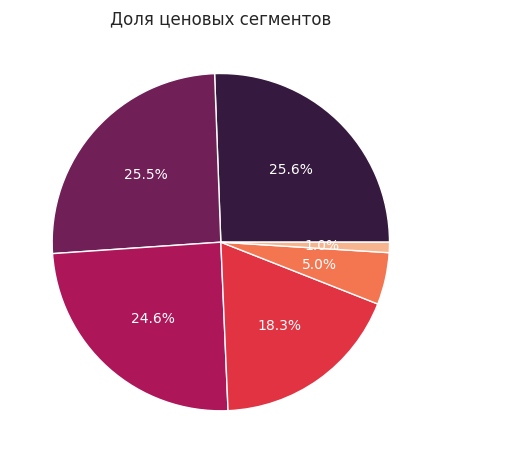

In [30]:
segment_counts = df['price_segment'].value_counts()
plt.pie(
    segment_counts.values, 
    labels=segment_counts.index, 
    autopct='%1.1f%%', 
    textprops={'color': 'white', 'fontsize': 10})
plt.title('Доля ценовых сегментов')
plt.tight_layout()
plt.show()

*  Для визуализации использую логарифмированные цены

**Перевод логарифмированной шкалы:**
- log_price = 3.0 → 20 у.е.
- log_price = 4.0 → 55 у.е.  
- log_price = 5.0 → 150 у.е.
- Разница в 1 единицу = цена отличается в ~2.7 раза

In [31]:
df['log_price'] = np.log1p(df['price'])

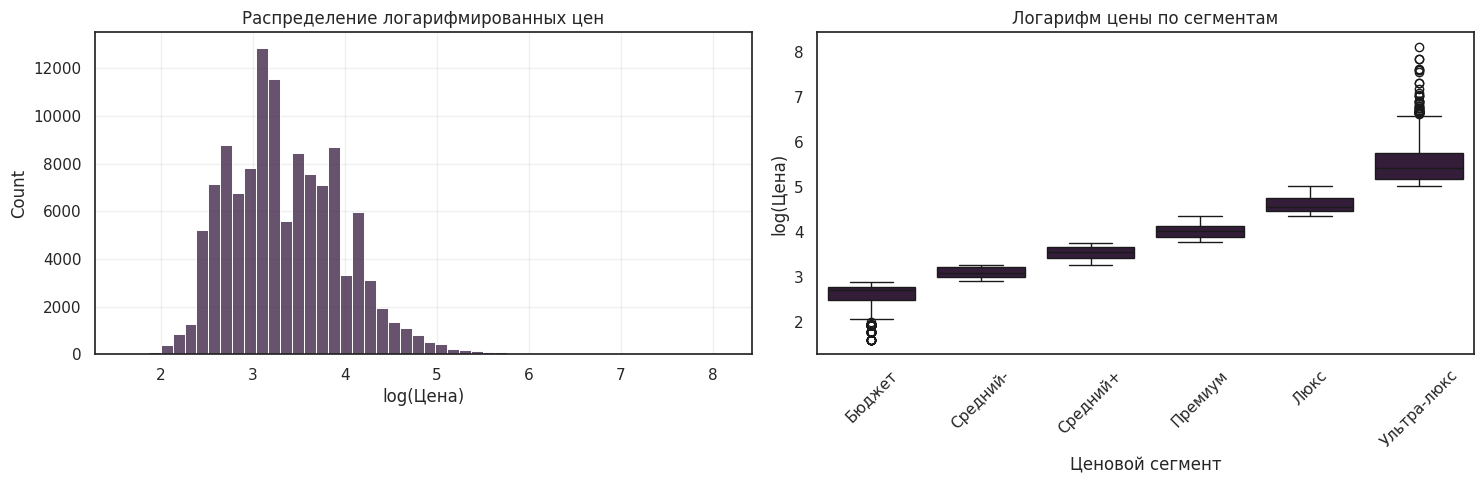

In [32]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['log_price'], bins=50)
plt.title('Распределение логарифмированных цен')
plt.xlabel('log(Цена)')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='price_segment', y='log_price')
plt.title('Логарифм цены по сегментам')
plt.xlabel('Ценовой сегмент')
plt.ylabel('log(Цена)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 6 Обзоры, эксперты и рейтинги

### `description` - описания вин 

 * Популярные слова в описаниях вин

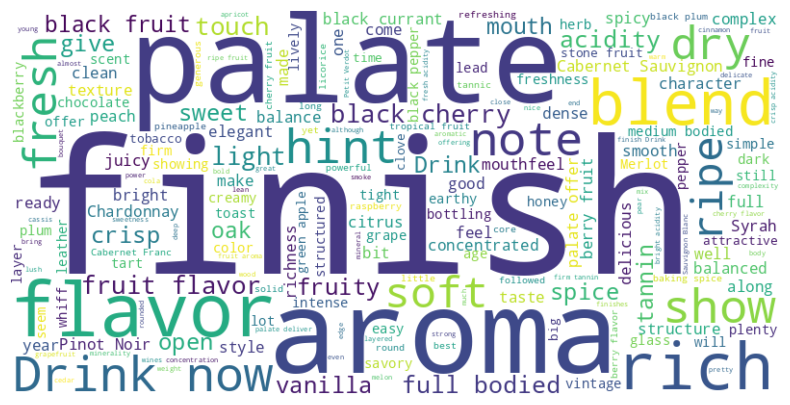

In [33]:
wine_stopwords = {
    'Wine', 'Vineyards', 'Vineyard', 'Estate', 'Reserve', 'Cellars', 
    'Winery', 'Family', 'Series', 'Selection', 'Private', 'Limited',
    'Special', 'Grand', 'Old', 'New', 'French', 'American', 'California',
    'Organic', 'Biodynamic', 'Natural', 'Red', 'White', 'Rose', 'Sparkling', 'nose'
}

stopwords = set(STOPWORDS)
stopwords.update(wine_stopwords)

text = ' '.join(df['description'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      stopwords=stopwords).generate(text)

plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

* Самое короткое описание

In [34]:
df['desc_length'] = df['description'].str.len()

shortest_idx = df['desc_length'].idxmin()
shortest = df.loc[shortest_idx]
print(f'Длина: {shortest['desc_length']} символов')
print(f'Рейтинг: {shortest['points']}')
print(f'Цена: {shortest['price']} у.е.')
print(f'Сорт: {shortest['variety']}')
print(f'Описание: {shortest['description']}')

Длина: 20 символов
Рейтинг: 88
Цена: 24.0 у.е.
Сорт: Chardonnay
Описание: Imported by Kobrand.


* Самое длинное описание

In [35]:
longest_idx = df['desc_length'].idxmax()
longest = df.loc[longest_idx]
print(f'Длина: {longest['desc_length']} символов')
print(f'Рейтинг: {shortest['points']}')
print(f'Цена: {longest['price']} у.е.')
print(f'Сорт: {longest['variety']}')
print(f'Описание: {longest['description']}')  

Длина: 829 символов
Рейтинг: 88
Цена: 45.0 у.е.
Сорт: Red Blend
Описание: Dark, dusty, strongly scented with barrel toast, coffee grounds and incense, this is the most substantial and complete version to date. Balancing cherry and plum fruit against the pretty barrel-infused tannins, it glides gracefully across the palate into a seamless finish.   Saggi is the Long Shadows collaboration with Tuscany's Ambrogio and Giovanni Folonari. the blend in 2007 is 43% Sangiovese, 36% Cabernet Sauvignon and 21% Syrah. With each new vintage, the percentage of Sangiovese climbs, putting more Tuscany in this new world super-Tuscan wine. Dark, dusty, strongly scented with barrel toast, coffee grounds and incense, this is the most substantial and complete version to date. Balancing cherry and plum fruit against the pretty barrel-infused tannins, it glides gracefully across the palate into a seamless finish.


* Анализ тональности (sentiment) по ценовым сегментам

In [36]:
df['sentiment'] = df['description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

expensive_sentiment = df[df['price'] > df['price'].quantile(0.8)]['sentiment'].mean()
cheap_sentiment = df[df['price'] < df['price'].quantile(0.2)]['sentiment'].mean()

print(f'Тональность дорогих вин: {expensive_sentiment:.2f}')
print(f'Тональность дешевых вин: {cheap_sentiment:.2f}')

Тональность дорогих вин: 0.15
Тональность дешевых вин: 0.16


Дешевые вина имеют чуть более позитивные описания, чем дорогие. Возможно дорогие вина описывают более сдержанно, а дешёвые приукрашивают.  
Выраженных отличий нет.

* Визуализация распределения тональности  
Интерпретация:
    * \> 0.2 - явно позитивный тон
    * 0.05 - 0.2 - слабо позитивный тон
    * -0.05 - 0.05 - нейтральный тон
    * < -0.05 - негативный тон

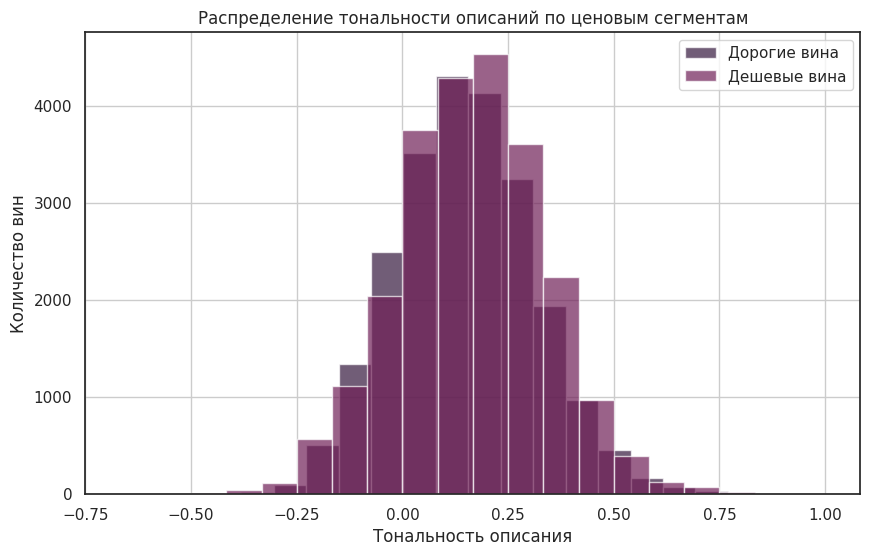

In [37]:
plt.figure(figsize=(10, 6))
df[df['price'] > df['price'].quantile(0.8)]['sentiment'].hist(alpha=0.7, label='Дорогие вина', bins=20)
df[df['price'] < df['price'].quantile(0.2)]['sentiment'].hist(alpha=0.7, label='Дешевые вина', bins=20)
plt.xlabel('Тональность описания')
plt.ylabel('Количество вин')
plt.legend()
plt.title('Распределение тональности описаний по ценовым сегментам')
plt.show()

In [38]:
print('Статистика тональности по всем винам:')
print(f'Средняя тональность: {df['sentiment'].mean():.3f}')
print(f'Стандартное отклонение: {df['sentiment'].std():.3f}')
print(f'Минимум: {df['sentiment'].min():.3f}')
print(f'Максимум: {df['sentiment'].max():.3f}')

Статистика тональности по всем винам:
Средняя тональность: 0.157
Стандартное отклонение: 0.170
Минимум: -0.800
Максимум: 1.000


Большинство описаний находятся в положительной зоне.  
Стандартное отклонение 0.170 - относительно небольшой разброс. Описания написаны в схожем стиле, нет резких контрастов.

In [39]:
most_positive_idx = df['sentiment'].idxmax()
most_positive = df.loc[most_positive_idx]
print('🎉 САМОЕ ПОЗИТИВНОЕ ОПИСАНИЕ:')
print(f'Тональность: {most_positive['sentiment']:.3f}')
print(f'Рейтинг: {shortest['points']}')
print(f'Цена: {most_positive['price']} у.е.')
print(f'Сорт: {most_positive['variety']}')
print(f'Описание: {most_positive['description']}')
print('-' * 80)

most_negative_idx = df['sentiment'].idxmin()
most_negative = df.loc[most_negative_idx]
print('😞 САМОЕ НЕГАТИВНОЕ ОПИСАНИЕ:')
print(f'Тональность: {most_negative['sentiment']:.3f}')
print(f'Рейтинг: {shortest['points']}')
print(f'Цена: {most_negative['price']} у.е.')
print(f'Сорт: {most_negative['variety']}')
print(f'Описание: {most_negative['description']}')
print('-' * 80)

🎉 САМОЕ ПОЗИТИВНОЕ ОПИСАНИЕ:
Тональность: 1.000
Рейтинг: 88
Цена: 30.0 у.е.
Сорт: Rosé
Описание: Produced from organic grapes, the wine is ripe and packed with fruit. It has a delicious line of acidity, as well as weight and peach and red-fruit flavors. The acidity keeps the exuberance in check. Drink now.
--------------------------------------------------------------------------------
😞 САМОЕ НЕГАТИВНОЕ ОПИСАНИЕ:
Тональность: -0.800
Рейтинг: 88
Цена: 25.0 у.е.
Сорт: Cabernet Sauvignon
Описание: Touches of soy, cedar and smoked meat enhance the base of blueberry on the nose of this bottling from a vineyard in the geographic heart of the Santa Ynez Valley. Mocha and blackberry flavors show on the sip, where an even-keeled acidity holds it all together.
--------------------------------------------------------------------------------


Вероятно TextBlob плохо работает с винными терминами на английском.  
Слова 'soy' (соя), 'cedar' (кедр), 'smoked meat' (копченое мясо), 'mocha' (мокко), 'acidity' (кислотность) алгоритм воспринимает как негативные.  
В контексте вин эти термины нейтральны или даже позитивны - они описывают сложный букет.

* Статистика по ключевым вкусовым профилям вин

In [40]:
taste_words = ['fruity', 'oaky', 'spicy', 'herbal', 'mineral', 'earthy', 
               'citrus', 'berry', 'chocolate', 'vanilla', 'caramel']

results = []
total_wines = len(df['description'].dropna())

for word in taste_words:
    count = df['description'].str.contains(word, case=False, na=False).sum()
    percentage = (count / total_wines) * 100
    results.append((word, count, percentage))

results.sort(key=lambda x: x[1], reverse=True)

for word, count, percentage in results:
    print(f' {word:<10} {count:>5} раз ({percentage:>.1f}%)')

 berry      38218 раз (31.9%)
 citrus     11353 раз (9.5%)
 mineral    10263 раз (8.6%)
 vanilla     9820 раз (8.2%)
 fruity      8675 раз (7.2%)
 chocolate   7869 раз (6.6%)
 spicy       6470 раз (5.4%)
 herbal      5189 раз (4.3%)
 earthy      4612 раз (3.8%)
 caramel     2767 раз (2.3%)
 oaky        2530 раз (2.1%)


### `taster_name`, `taster_twitter_handle` - авторы обзоров 

* Статистика по обзорам

In [41]:
print(f'- Всего обзоров: {len(df):,}')
print(f'- Обзоров с указанием эксперта: {df['taster_name'].notna().sum():,} ({df['taster_name'].notna().mean()*100:.1f}%)')
print(f'- Обзоров с Twitter эксперта: {df['taster_twitter_handle'].notna().sum():,} ({df['taster_twitter_handle'].notna().mean()*100:.1f}%)')

- Всего обзоров: 119,928
- Обзоров с указанием эксперта: 95,012 (79.2%)
- Обзоров с Twitter эксперта: 90,483 (75.4%)


* Распределение обзоров по экспертам

In [42]:
top_tasters = df['taster_name'].value_counts().head()
print('🏆 Самые продуктивные эксперты:')
for taster, count in top_tasters.items():
    print(f'  {taster}: {count:,} обзоров')

🏆 Самые продуктивные эксперты:
  Roger Voss: 23,558 обзоров
  Michael Schachner: 14,039 обзоров
  Kerin O’Keefe: 9,697 обзоров
  Paul Gregutt: 8,867 обзоров
  Virginie Boone: 8,708 обзоров


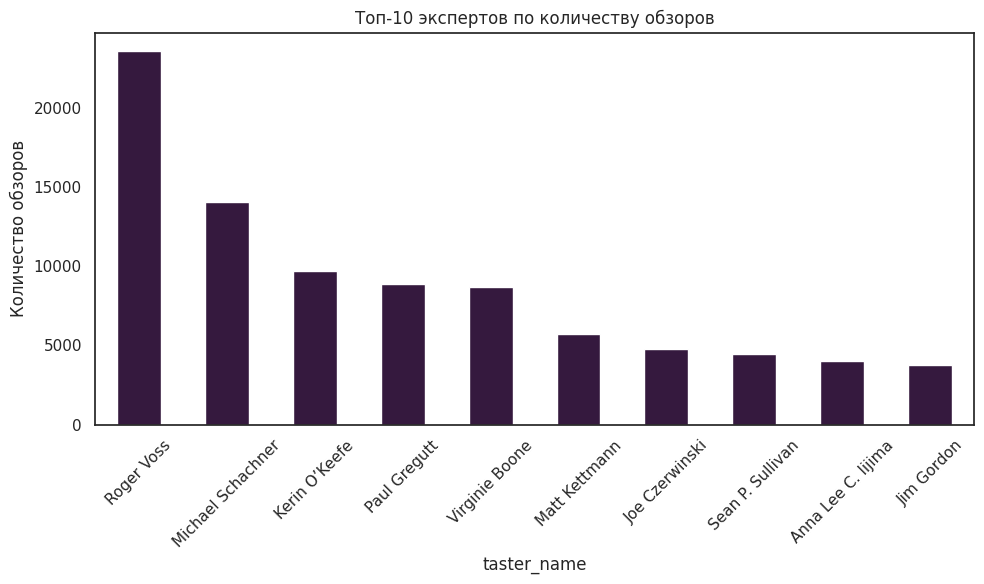

In [43]:
plt.figure(figsize=(10, 6))
df['taster_name'].value_counts().head(10).plot(kind='bar')
plt.title('Топ-10 экспертов по количеству обзоров')
plt.ylabel('Количество обзоров')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
print(f'Записей с Twitter, но без имени эксперта: {len(df[df['taster_twitter_handle'].notna() & df['taster_name'].isna()])}')
print(f'\nЗаписей с именем эксперта, но без Twitter: {len(df[df['taster_name'].notna() & df['taster_twitter_handle'].isna()])}')

Записей с Twitter, но без имени эксперта: 0

Записей с именем эксперта, но без Twitter: 4529


* Самые активные эксперты с Twitter

In [45]:
twitter_stats = df.groupby(['taster_name', 'taster_twitter_handle']).size().reset_index(name='mentions')
twitter_stats = twitter_stats.sort_values('mentions', ascending=False).head(10)

for i, (_, row) in enumerate(twitter_stats.iterrows(), 1):
    print(f'{i:2}. {row['taster_name']:20} {row['taster_twitter_handle']:20} {row['mentions']:4} упоминаний')

 1. Roger Voss           @vossroger           23558 упоминаний
 2. Michael Schachner    @wineschach          14039 упоминаний
 3. Kerin O’Keefe        @kerinokeefe         9697 упоминаний
 4. Paul Gregutt         @paulgwine           8867 упоминаний
 5. Virginie Boone       @vboone              8708 упоминаний
 6. Matt Kettmann        @mattkettmann        5730 упоминаний
 7. Joe Czerwinski       @JoeCz               4765 упоминаний
 8. Sean P. Sullivan     @wawinereport        4461 упоминаний
 9. Jim Gordon           @gordone_cellars     3766 упоминаний
10. Anne Krebiehl MW     @AnneInVino          3282 упоминаний


* Средняя цена вин по экспертам

In [46]:
expert_price_preference = df.groupby('taster_name')['price'].agg(['mean', 'median', 'count'])
expert_price_preference

,mean,median,count
taster_name,,,
Alexander Peartree,28.900783,25.0,383
Anna Lee C. Iijima,30.237117,22.0,4017
Anne Krebiehl MW,31.353900,25.0,3282
Carrie Dykes,30.356589,28.0,129
Christina Pickard,29.333333,28.5,6
Fiona Adams,32.041667,27.5,24
Jeff Jenssen,22.281928,16.0,415
Jim Gordon,26.987387,23.0,3766
Joe Czerwinski,35.255509,22.0,4765


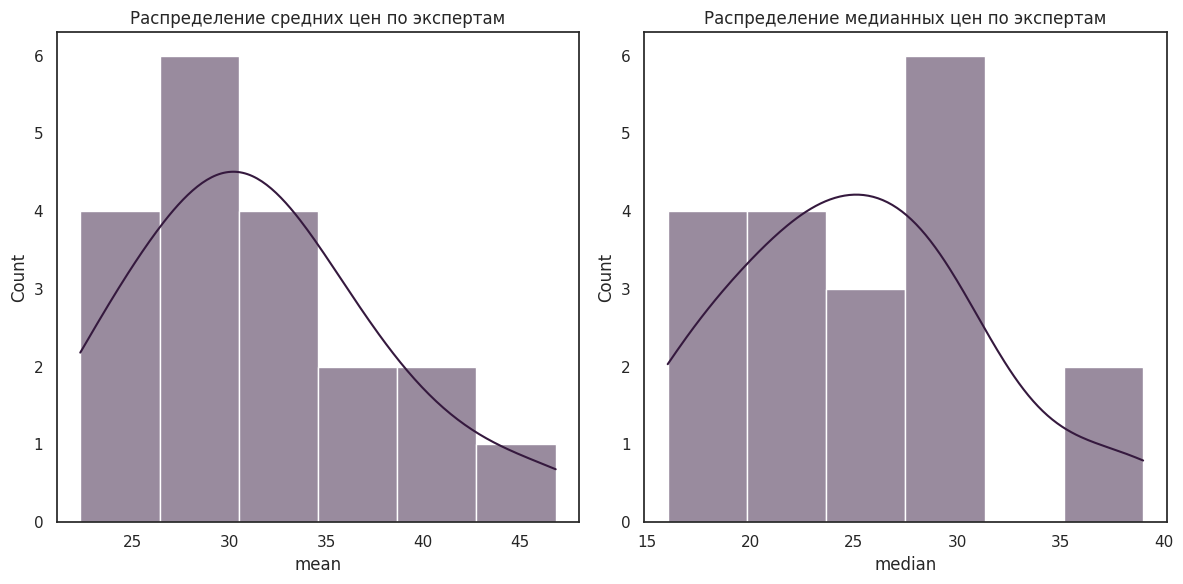

In [47]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
sns.histplot(data=expert_price_preference, x='mean', kde=True)
plt.title('Распределение средних цен по экспертам')

plt.subplot(1, 2, 2) 
sns.histplot(data=expert_price_preference, x='median', kde=True)
plt.title('Распределение медианных цен по экспертам')

plt.tight_layout()
plt.show()

Нет специализации по цене - каждый эксперт оценивает вина разных ценовых категорий, нет явного смещения в дорогой/дешевый сегмент

* Pазброс цен у каждого эксперта

In [48]:
expert_price_range = df.groupby('taster_name')['price'].agg(['min', 'max', 'std'])
print('Разброс цен по экспертам:')
print(expert_price_range.sort_values('std', ascending=False))

Разброс цен по экспертам:
                     min     max        std
taster_name                                
Roger Voss           5.0  3300.0  66.286927
Joe Czerwinski       5.0   850.0  45.131964
Anna Lee C. Iijima   4.0   775.0  41.816950
Kerin O’Keefe        6.0   800.0  38.220533
Virginie Boone       7.0   625.0  33.193314
Matt Kettmann        7.0  2013.0  32.971745
Michael Schachner    4.0   770.0  28.816637
Anne Krebiehl MW    10.0  1100.0  25.477657
Jeff Jenssen         6.0   320.0  23.135497
Lauren Buzzeo        5.0   350.0  20.791263
Sean P. Sullivan     6.0   240.0  20.187548
Paul Gregutt         5.0   275.0  19.058782
Jim Gordon           4.0   220.0  17.705925
Susan Kostrzewa      7.0   320.0  17.479448
Alexander Peartree  11.0   250.0  16.985228
Fiona Adams         17.0    80.0  16.861273
Mike DeSimone        9.0   120.0  16.830712
Christina Pickard   19.0    50.0  11.165423
Carrie Dykes        14.0    75.0  10.872700


* Cтрогие/лояльные эксперты (анализ стиля оценивания)

In [49]:
expert_range = df.groupby('taster_name')['points'].agg(['min', 'max', 'std'])
print(expert_range.sort_values('std', ascending=False))

                    min  max       std
taster_name                           
Christina Pickard    82   93  3.600926
Roger Voss           80  100  3.083474
Michael Schachner    80   98  3.068086
Virginie Boone       80   99  3.054967
Joe Czerwinski       80  100  2.903511
Paul Gregutt         80  100  2.852419
Jim Gordon           80   97  2.745278
Anna Lee C. Iijima   80   98  2.610994
Matt Kettmann        81   97  2.602762
Lauren Buzzeo        81   95  2.561519
Kerin O’Keefe        80  100  2.529686
Sean P. Sullivan     80   97  2.513158
Anne Krebiehl MW     80   97  2.426018
Susan Kostrzewa      80   94  2.391469
Jeff Jenssen         82   97  2.096358
Carrie Dykes         81   92  2.026382
Mike DeSimone        82   94  2.018577
Alexander Peartree   80   91  1.941269
Fiona Adams          82   91  1.775436


In [52]:
min_max_points = expert_range['max'].min()
print(f'Самый низкий "высокий" балл: {min_max_points}')

experts_with_min_max = expert_range[expert_range['max'] == min_max_points]
print('Эксперты:')
print(experts_with_min_max.index.tolist())

Самый низкий "высокий" балл: 91
Эксперты:
['Alexander Peartree', 'Fiona Adams']


In [53]:
print('Эксперты, выставлявшие 100 баллов:')
print(df[df['points'] == 100]['taster_name'].value_counts())

Эксперты, выставлявшие 100 баллов:
taster_name
Roger Voss        10
Paul Gregutt       2
Joe Czerwinski     1
Kerin O’Keefe      1
Name: count, dtype: int64


In [54]:
print('Используют весь диапазон:')
for name in expert_range.head(3).index:
    data = expert_range.loc[name]
    print(f'   {name:20} std: {data['std']:4.2f} | диапазон: {data['min']}-{data['max']}')

print('\nУзкий диапазон оценок:')
for name in expert_range.tail(3).index:
    data = expert_range.loc[name]
    print(f'   {name:20} std: {data['std']:4.2f} | диапазон: {data['min']}-{data['max']}')

Используют весь диапазон:
   Alexander Peartree   std: 1.94 | диапазон: 80.0-91.0
   Anna Lee C. Iijima   std: 2.61 | диапазон: 80.0-98.0
   Anne Krebiehl MW     std: 2.43 | диапазон: 80.0-97.0

Узкий диапазон оценок:
   Sean P. Sullivan     std: 2.51 | диапазон: 80.0-97.0
   Susan Kostrzewa      std: 2.39 | диапазон: 80.0-94.0
   Virginie Boone       std: 3.05 | диапазон: 80.0-99.0


* Корреляция оценок экспертов, которые оценивали одни и те же вина

In [55]:
multi_expert = df.groupby('title').filter(lambda x: x['taster_name'].nunique() > 1)
print(f'Вин с несколькими экспертами: {multi_expert['title'].nunique()}')

Вин с несколькими экспертами: 46


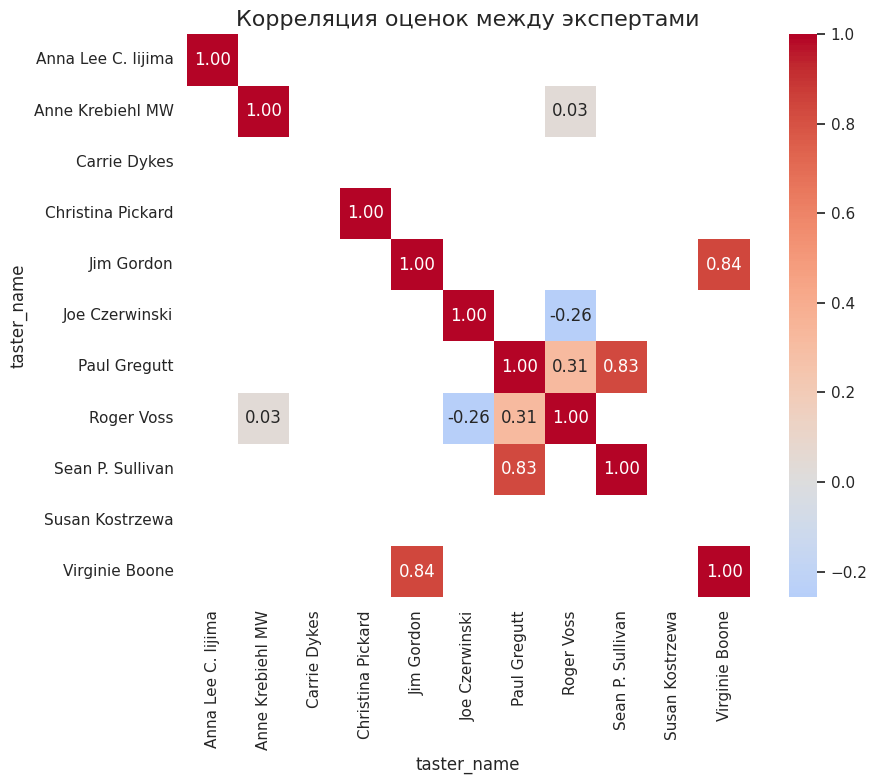

In [56]:
expert_ratings = multi_expert.pivot_table(index='title', 
                               columns='taster_name', 
                               values='points', 
                               aggfunc='mean')
correlation_matrix = expert_ratings.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True)
plt.title('Корреляция оценок между экспертами', fontsize=16)
plt.tight_layout()
plt.show()

In [57]:
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Убираем зеркальные пары и NaN
unique_pairs = {}
for pair, corr_value in corr_pairs.items():
    if pd.notna(corr_value): 
        expert1, expert2 = pair
        sorted_pair = tuple(sorted([expert1, expert2]))
        if sorted_pair not in unique_pairs:
            unique_pairs[sorted_pair] = corr_value

unique_corr_series = pd.Series(unique_pairs)

print(f'📈 ОБЩАЯ СТАТИСТИКА:')
print(f'Уникальных пар экспертов: {len(unique_corr_series)}')
print(f'Средняя корреляция: {unique_corr_series.mean():.3f}')
print(f'Медианная корреляция: {unique_corr_series.median():.3f}')
print(f'Количество сильных связей (>0.7): {(unique_corr_series > 0.7).sum()}')
print(f'Количество слабых связей (<0.3): {(unique_corr_series < 0.3).sum()}')

print(f'\n🎯 ВСЕ ПАРЫ ЭКСПЕРТОВ (отсортировано по силе корреляции):')
sorted_pairs = unique_corr_series.sort_values(ascending=False)

for pair, corr_value in sorted_pairs.items():
    expert1, expert2 = pair
    
    if corr_value > 0.7:
        strength = 'очень сильная'
    elif corr_value > 0.5:
        strength = 'сильная'
    elif corr_value > 0.3:
        strength = 'умеренная' 
    elif corr_value > 0.1:
        strength = 'слабая'
    elif corr_value > -0.1:
        strength = 'очень слабая'
    elif corr_value > -0.3:
        strength = 'слабая отрицательная'
    else:
        strength = 'умеренная отрицательная'
    
    print(f'• {expert1:20} + {expert2:20}: {corr_value:.3f} - {strength}')

📈 ОБЩАЯ СТАТИСТИКА:
Уникальных пар экспертов: 5
Средняя корреляция: 0.352
Медианная корреляция: 0.314
Количество сильных связей (>0.7): 2
Количество слабых связей (<0.3): 2

🎯 ВСЕ ПАРЫ ЭКСПЕРТОВ (отсортировано по силе корреляции):
• Jim Gordon           + Virginie Boone      : 0.841 - очень сильная
• Paul Gregutt         + Sean P. Sullivan    : 0.831 - очень сильная
• Paul Gregutt         + Roger Voss          : 0.314 - умеренная
• Anne Krebiehl MW     + Roger Voss          : 0.033 - очень слабая
• Joe Czerwinski       + Roger Voss          : -0.257 - слабая отрицательная


* Предпочтения по цветам

In [58]:
expert_color = pd.crosstab(df['taster_name'], df['color'])
expert_color

color,red,rose,sparkling,unknown,white
taster_name,,,,,
Alexander Peartree,195,16,14,2,156
Anna Lee C. Iijima,901,129,147,67,2773
Anne Krebiehl MW,448,53,235,146,2400
Carrie Dykes,72,6,0,2,49
Christina Pickard,3,0,1,0,2
Fiona Adams,16,0,6,0,2
Jeff Jenssen,174,9,11,44,177
Jim Gordon,2516,113,94,40,1003
Joe Czerwinski,2362,234,67,41,2061


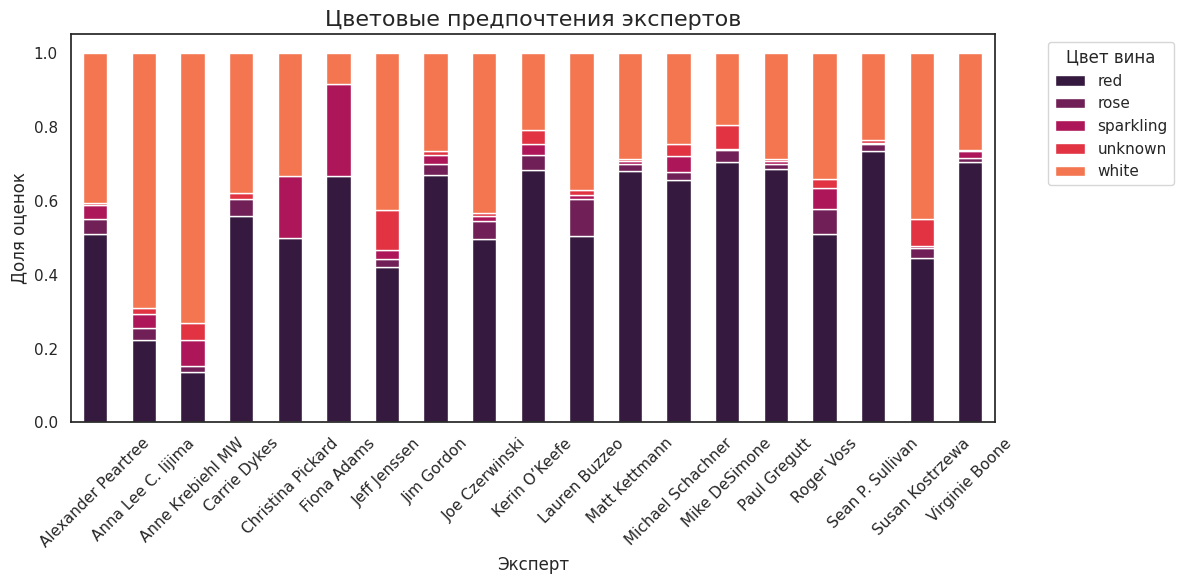

In [59]:
expert_color_pct = expert_color.div(expert_color.sum(axis=1), axis=0)

expert_color_pct.plot(kind='bar', 
                      stacked=True, 
                      figsize=(12, 6))

plt.title('Цветовые предпочтения экспертов', fontsize=16)
plt.xlabel('Эксперт')
plt.ylabel('Доля оценок')
plt.legend(title='Цвет вина', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Специализация экспертов по странам (топ-15 стран по количеству оценок)

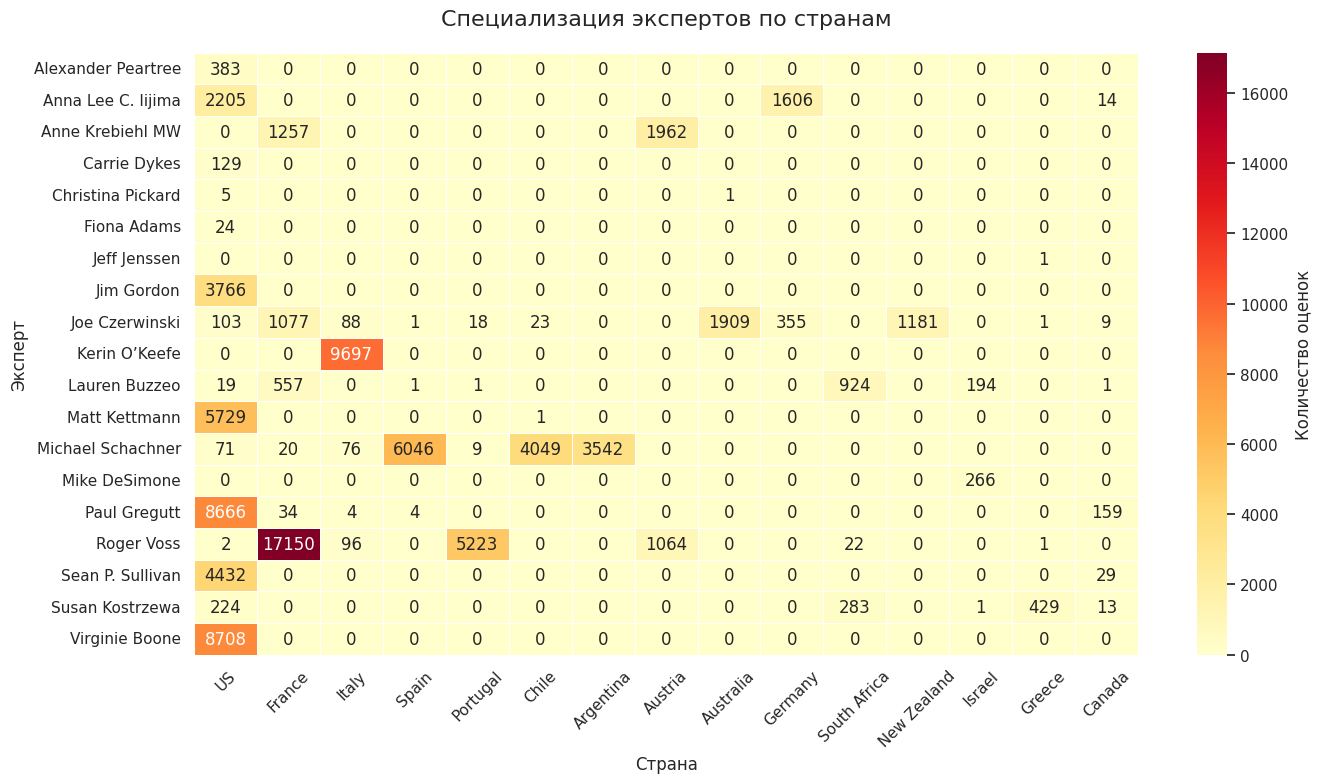

In [60]:
expert_country = pd.crosstab(df['taster_name'], df['country'])

top_countries = df['country'].value_counts().head(15).index
expert_country = expert_country[top_countries]

# Строим heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(expert_country, 
            annot=True, 
            fmt='d',
            cmap='YlOrRd',
            linewidths=0.5,
            cbar_kws={'label': 'Количество оценок'})

plt.title('Специализация экспертов по странам', fontsize=16, pad=20)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Эксперт', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### `points` оценки вин

In [61]:
df.points.describe()

count    119928.000000
mean         88.442149
std           3.093287
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [62]:
print(f'• Средний рейтинг: {df['points'].mean():.1f} баллов (медиана: {df['points'].median():.1f} баллов)')
print(f'• 50% вин имеют рейтинг до {df['points'].median():.0f} баллов')
print(f'• 75% вин имеют рейтинг до {df['points'].quantile(0.75):.0f} баллов') 
print(f'• Разброс рейтингов: от {df['points'].min():.0f} до {df['points'].max():.0f} баллов')
print(f'• Стандартное отклонение {df['points'].std():.1f} баллов → {'высокая' if df['points'].std() > df['points'].mean() * 0.3 else 'умеренная'} вариативность')

• Средний рейтинг: 88.4 баллов (медиана: 88.0 баллов)
• 50% вин имеют рейтинг до 88 баллов
• 75% вин имеют рейтинг до 91 баллов
• Разброс рейтингов: от 80 до 100 баллов
• Стандартное отклонение 3.1 баллов → умеренная вариативность


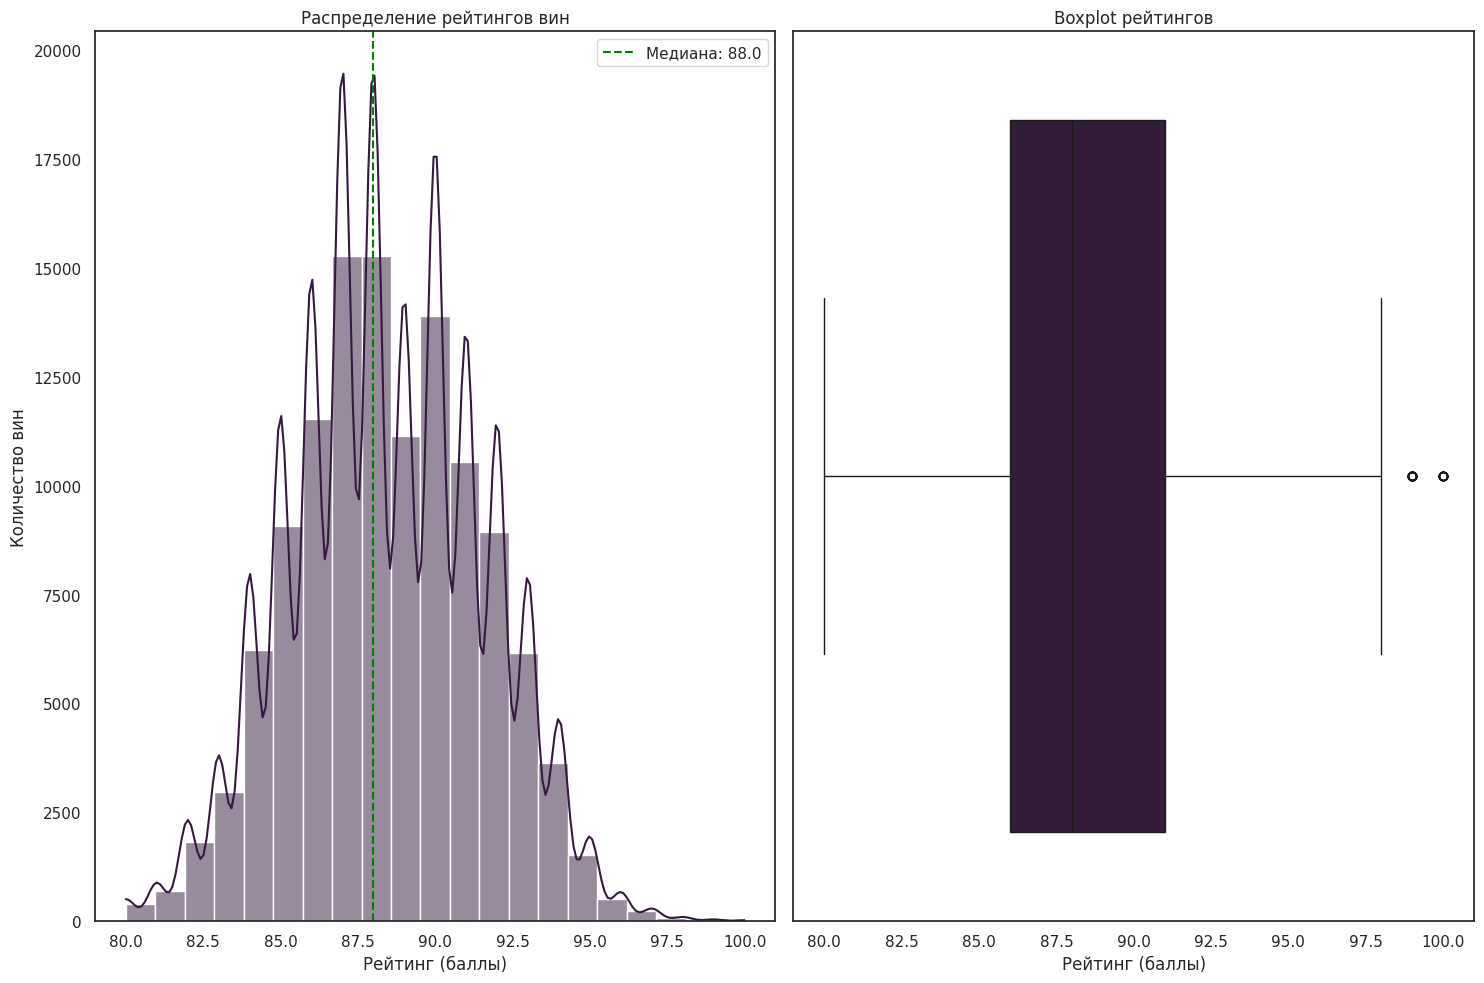

In [63]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 10))

sns.histplot(data=df, x='points', bins=21, kde=True, ax=ax1)
ax1.axvline(df['points'].median(), color='green', linestyle='--', label=f'Медиана: {df['points'].median():.1f}')
ax1.set_xlabel('Рейтинг (баллы)')
ax1.set_ylabel('Количество вин')
ax1.set_title('Распределение рейтингов вин')
ax1.legend()

sns.boxplot(data=df, x='points', ax=ax2)
ax2.set_xlabel('Рейтинг (баллы)')
ax2.set_title('Boxplot рейтингов')

plt.tight_layout()
plt.show()

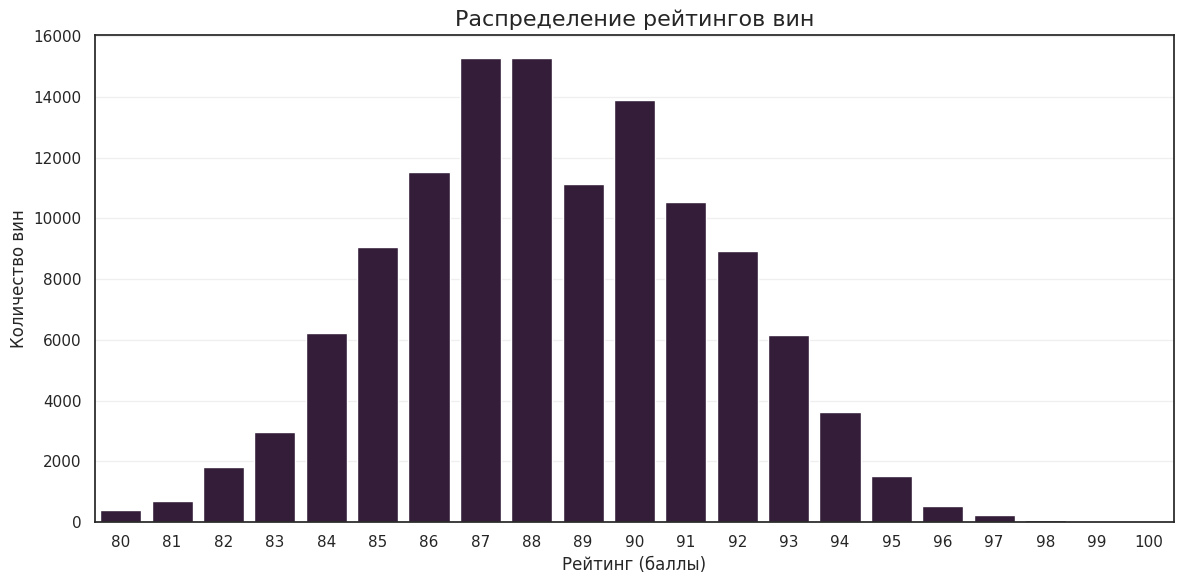

In [64]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='points', order=sorted(df['points'].unique()))
plt.title('Распределение рейтингов вин', fontsize=16)
plt.xlabel('Рейтинг (баллы)')
plt.ylabel('Количество вин')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Влияние рейтинга вина на его цену.

#### Построим диаграмму рассеяния между параметрами стоимость и рейтинг.

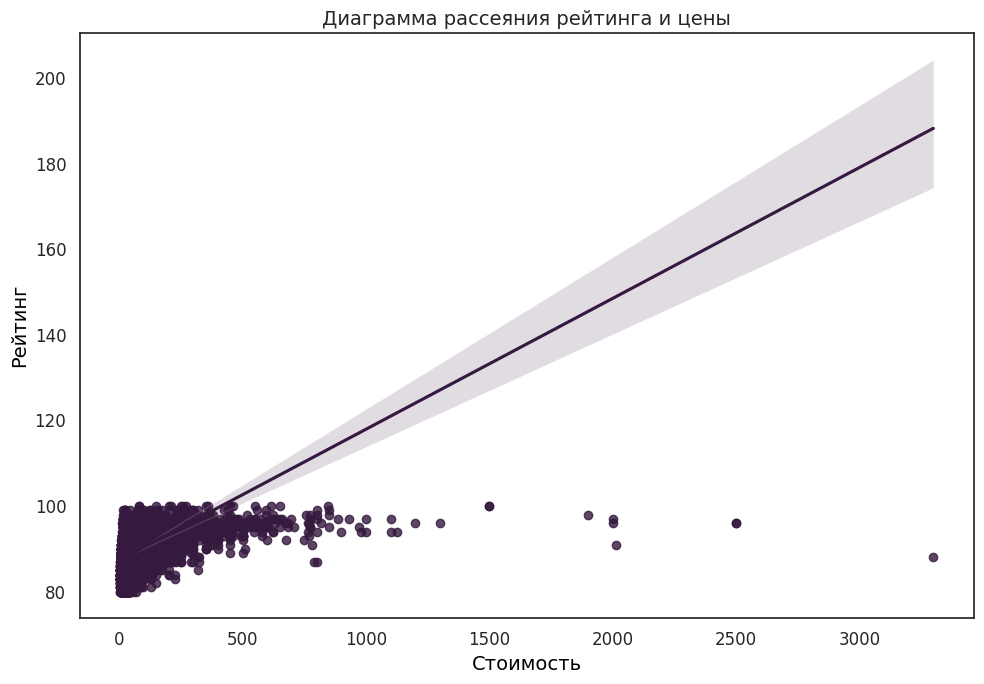

In [67]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.regplot(x='price', y='points', data=df)
plt.xlabel('Стоимость', fontsize=14, color='k')
plt.ylabel('Рейтинг', fontsize=14, color='k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Диаграмма рассеяния рейтинга и цены',
    fontsize=14)
plt.tight_layout() 
plt.show()

 Построим диаграмму рассеяния между параметрами стоимость и рейтинг для набора данных очищенных от выбросов по цене.

NameError: name 'df_cleaned' is not defined

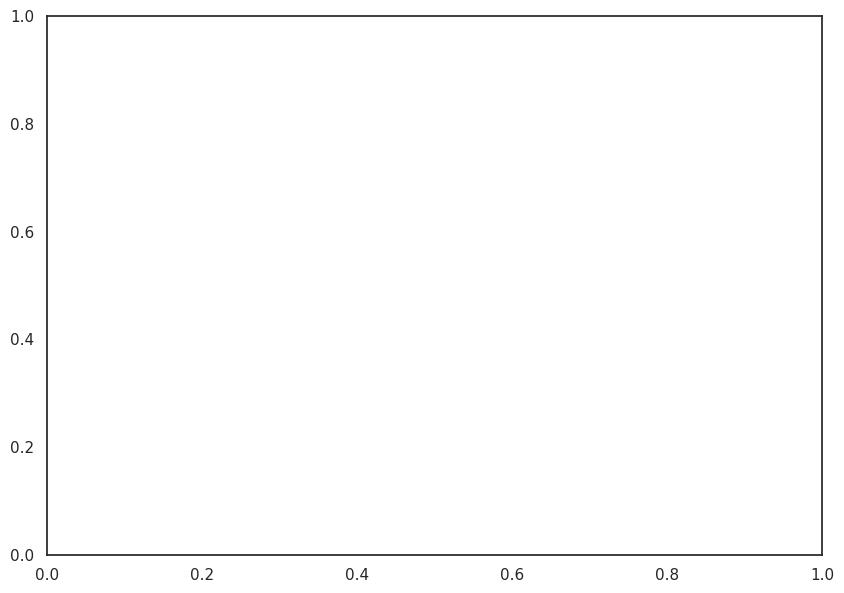

In [66]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.regplot(x='price', y='points', data=df_cleaned)
plt.xlabel('Стоимость', fontsize=14, color='k')
plt.ylabel('Рейтинг', fontsize=14, color='k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(
    0.25, -0.01, 
    'Диаграмма рассеяния рейтинга и цены, очищенные данные',
    fontsize=14)
plt.tight_layout() 
plt.show()

Визуально не определяется значительная зависимость между параметрами цена и рейтинг.<br>

#### Посчитаем корреляцию 

In [ ]:
df.corr()

Коэффициент корреляции между числовыми параметрами стоимость и рейтинг равен 0,423<br>
Между величинами есть слабая положительная зависимость.

In [ ]:
df_cleaned.corr()

Для очищенного от выбросов набора данных корреляция равна 0,54.<br>
Между величинами есть положительная зависимость средней степени.

In [ ]:
sns.heatmap(df_cleaned.corr(),
            cmap=sns.color_palette(n_colors=2, desat=None, as_cmap=False),
            annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(
    0.01, -0.01,
    'Матрица корреляции между стоимостью и рейтингом.',
    fontsize=14)
plt.show()

#### Проверим зависимости для разных ценовых сегментов.

In [ ]:
df_low_price.corr()

Для низкого ценового сегмента коэффициент корреляции между рейтингом и ценой равен 0,3.<br>
Слабая положительная зависимость. 

In [ ]:
df_medium_price.corr()

Для бюджетного ценового сегмента коэффициент корреляции между рейтингом и ценой равен 0,27.<br>
Слабая положительная зависимость. 

In [ ]:
df_high_price.corr()

Для бюджетного ценового сегмента коэффициент корреляции между рейтингом и ценой равен 0,15.<br>
Очень слабая положительная зависимость. 

In [ ]:
df_premium_price.corr()

Для бюджетного ценового сегмента коэффициент корреляции между рейтингом и ценой равен 0,266.<br>
Слабая положительная зависимость. 

## Влияние категориальных признаков на стоимость и рейтинг

### График «ящик с усами» по рейтингам, выполнив категоризацию по странам, по сортам вина.

#### Постороим зависимость рейтинга от страны-производителя вина.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 15))
sns.boxplot(y='country', x='points', data=df, palette='rocket')
plt.xlabel('Стоимости', fontsize=14, color='k')
plt.ylabel('Страны', fontsize=14, color='k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(
    0.3, 0.06,
    'Диаграмма размаха рейтинга с разбивкой по странам',
    fontsize=14)
plt.tight_layout() 
plt.show()

Визуально самые высокие средние рейтинги у Франции и Австрии.
Визуально самые низкие средние рейтинги у Израиля, Бразилии, Южной Кореи и Монтенегро.

#### Постороим зависимость рейтинга от сорта винограда.

In [ ]:
df['variety'].nunique()

В наборе данных большое количество уникальных значений сортов винограда (398 шт).<br>
Для лучшей визуализации построим диаграму зависимости рейтинга от сорта винограда, топ-20 самых распространённых сортов. 

In [ ]:
variety_top = df[df.variety.isin(
    df.variety.value_counts().head(20).index)]

fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(y='variety', x='points', data=variety_top, palette='rocket')
plt.xlabel('Рейтинг', fontsize=14, color='k')
plt.ylabel('Сорт винограда', fontsize=14, color='k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(
    0.2, 0.03,
    'Диаграмма размаха рейтинга с разбивкой по сортам винограда',
    fontsize=14)
plt.tight_layout() 
plt.show()

Визуально самые высокие средние рейтинги у сортов бордоский красный купаж и Неббиоло.
Визуально самые низкие средние рейтинги у сортов розе (конкретный сорт не указан) и Зинфандель.

In [ ]:
# 1. Анализ 100-балльных вин
perfect_wines = df[df['points'] == 100]
print('🍷 ВИНА С 100 БАЛЛАМИ:')
print(f'Всего: {len(perfect_wines)}')
print(f'Уникальных наименований: {perfect_wines['title'].nunique()}')
print('\nЭксперты, выставлявшие 100 баллов:')
print(perfect_wines['taster_name'].value_counts())

In [ ]:
perfect_wines[['title', 'country', 'price', 'variety', 'province', 'color', 'year']].sortby['price']

In [ ]:
# Bubble plot: возраст vs цена vs рейтинг (размер пузырька = количество)

In [ ]:
# Bubble plot: возраст vs цена vs рейтинг (размер пузырька = количество)
age_price_stats = df.groupby(pd.cut(df['wine_age'], bins=10)).agg({
    'price': 'mean',
    'points': 'mean',
    'wine_age': 'count'
}).reset_index()

plt.figure(figsize=(12, 8))
scatter = plt.scatter(age_price_stats['points'], 
                     age_price_stats['price'], 
                     s=age_price_stats['wine_age']/10,  # Размер пузырька
                     alpha=0.6, 
                     c=age_price_stats.index, 
                     cmap='viridis')

plt.colorbar(scatter, label='Возрастная группа')
plt.xlabel('Средний рейтинг')
plt.ylabel('Средняя цена (у.е.)')
plt.title('Bubble Plot: Возраст vs Цена vs Рейтинг\n(размер = количество вин)')

# Добавляем подписи для самых больших пузырьков
for i, row in age_price_stats.nlargest(3, 'wine_age').iterrows():
    plt.annotate(f'{row['wine_age']} вин', 
                (row['points'], row['price']),
                xytext=(10, 10), textcoords='offset points',
                fontsize=9, fontweight='bold')

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
sns.lineplot(data=df, x='year', y='price')

In [ ]:
df['desc_length'] = df['description'].str.len()

plt.figure(figsize=(10, 6))
plt.scatter(df['desc_length'], df['price'], alpha=0.5)
plt.xlabel('Длина описания')
plt.ylabel('Цена')
plt.title('Зависимость цены от длины описания')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df, y='country', x='price')
plt.xlabel('Стоимости', fontsize=14, color='k')
plt.ylabel('Страны', fontsize=14, color='k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(0.35, -0.001,
            'Диаграмма рассеяния стоимостей вин по странам',
            fontsize=14)
plt.tight_layout() 
plt.show()

In [ ]:
# Топ-10 самых популярных сортов по провинциям (отобраны по 1 из региона, самые многочисленные)
df.groupby('province').variety.apply(lambda x: x.value_counts()).sort_values(
    axis=0, ascending=False).to_frame().head(10)

#### Топ-5 самых дорогих вин.

In [ ]:
df[['price', 'points', 'variety', 'country', 'province']].sort_values(
    by='price', axis=0, ascending=False).head()

Самое дорогое вино: французское, цена - 2300 у.е., рейтинг - 99, сорт Bordeaux-style Red Blend, провинция - Бордо.</br>
В пятёрку самых дорогих вин входят вина из сортов: красный бордоский купаж, Шардоне, 
Грюнер Вельтлинер, Фурминт.

#### Определим средние цены вин для каждого региона (province).

Топ-10 провинций с самыми высокими средними ценами на вино:

In [ ]:
df['price'].groupby(df['province']).mean().to_frame().sort_values(
    by='price', axis=0, ascending=False).head(10)

В пятёрку самых высоких средних стоимостей вина входят вина провинций: Токай, Эгейский регион, Шампань, Санта-Круз, Израиль

Топ-10 провинций с самыми низкими средними ценами на вино:

In [ ]:
df['price'].groupby(df['province']).mean().to_frame().sort_values(
    by='price', axis=0, ascending=True).head(10)

В пятёрку самых низких средних стоимостей вина входят вина провинций: Верхняя Венгрия, Резас, Приморско, Северо-Западная Италия, Рекиноа

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Боксплот рейтингов по странам
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='country', y='points')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Heatmap корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(df[['price', 'points']].corr(), annot=True)
plt.show()

### Выберем сорта вина с наибольшей стоимостью. Для каждого региона (province) найдём среднюю цену вина.

In [ ]:
# Проверка нормальности
from scipy import stats
stats.skew(df['price'])  # Асимметрия
stats.kurtosis(df['price'])  # Эксцесс

In [ ]:
# Анализ ценовых сегментов
price_bins = pd.cut(df['price'], bins=[0, 20, 50, 100, 1000])
price_bins.value_counts()

# Анализ по регионам
df.groupby('country')['points'].mean().sort_values(ascending=False)

# Корреляция цена-рейтинг
df[['price', 'points']].corr()

In [ ]:
df.groupby('province').variety.apply(lambda x: x.value_counts().nlargest(1)).sort_values(
    axis=0, ascending=False).to_frame().head(10)

В пятёрку самых популярных сортов винограда по провинциям входят: 
- Пино-нуар - Калифорния
- красный бордоский купаж - Бордо
- Санджовезе - Тоскана 
- Пино-нуар - Орегон

Топ-10 самых популярных сортов по провинциям.

####  Сорта вина лидируют по рейтингам.</br>
Топ-5 вин с наибольшими рейтингами изготовлены из следующих сортов винограда: Мерло, Шардоне,  купаж Каберне, португальский красный купаж и и красный бордоский купаж.

In [ ]:
df[['variety', 'province', 'country', 'points', 'price']].sort_values(
    by='points', axis=0, ascending=False).head(5)

Вина с максимальным рейтингом (100 балов):
- из винограда сотра Мерло, произведённое в Италии, Тоскана, стоимостью 460 у.е.
- из винограда сотра Шардоне, произведённое во Франции, Шампань, стоимостью 1400 у.е.
- из винограда купажа Каберне, произведённое в США, Калифорния, стоимостью 245 у.е.

## 1.7. Сохранение очищенного датасета

Сохраняем очищенный датасет для последующего использования

In [ ]:
df_cleaned = df.copy()
df_cleaned.to_csv('../data/wine_reviews_cleaned.csv', index=False)

print('Датасет успешно сохранен: wine_reviews_cleaned.csv')
print(f'Размер: {df_cleaned.shape[0]:,} строк, {df_cleaned.shape[1]} столбцов')

Проверка сохраненнёного файла

In [ ]:
df_check = pd.read_csv('data/wine_reviews_cleaned.csv')
print(f'- Размер: {df_check.shape[0]:,} строк × {df_check.shape[1]} столбцов')
print(f'- Пропуски: {df_check.isna().sum().sum()} (обработаны)')
print(f'- Дубликаты: {df_check.duplicated().sum()}')

 ## Выводы по этапу 'Исследовательский анализ данных': 
- В пятёрку самых популярных сортов винограда по провинциям входят: Пино-нуар - Калифорния, красный бордоский купаж - Бордо, Санджовезе - Тоскана, Пино-нуар - Орегон
- Самое дорогое вино: французское, цена - 2300 у.е., рейтинг - 99, сорт Bordeaux-style Red Blend, провинция - Бордо.
- В пятёрку самых дорогих вин входят вина из сортов: красный бордоский купаж, Шардоне, Грюнер Вельтлинер, Фурминт.
- В пятёрку самых высоких средних стоимостей вина входят вина провинций: Токай, Эгейский регион, Шампань, Санта-Круз, Израиль
- В пятёрку самых низких средних стоимостей вина входят вина провинций: Верхняя Венгрия, Резас, Приморско, Северо-Западная Италия, Рекиноа
- Определены свойства параметра цена (price) - Среднее значение = 33,4 у.е., медиана = 24 у.е., 75% данных находятся в диапозоне <= 40 у.е.
- Была произведена очистка от выбросов по цене
- Определены ценовые сегменты вин (низкий, бюджетный/средний, высокий, премиальный) и были отобраны данные в соответствии с этими сегментами:
    - Низкий: стоимость меньше нижнего квантиля, q25 = 16 у.е.
    - Бюджетный (средний): стоимость в диапозоне между нижним и средним квантилем, q25 = 16 у.е и q75 = 40 у.е 
    - Высокий: стоимость в диапозоне между верхним квантилем и 'верхним усом', q75 = 40 у.е и higher_whisker = 76 у.е. 
    - Премиальный: цена выше 'верхнего уса', higher_whisker = 76 у.е.
- Определены популярные вина в бюджетном сегменте. В топ-10 самых популярных сортов винограда в среднем ценовом сегменте входят: Шардоне - 18%, Пино-нуар - 16%, красный купаж - 13%, Каберне-совиньон - 12%, Шираз и Совиньон блан - 8%, Зинфандель и Рислинг - 7%, Мерло и красный бордоский купаж - 6%
- Топ-5 самых высокооценённых вин из среднего ценового сегмента произведены из сортов винограда Шардоне, Шираз, красный купаж, купаж сортов Семильон и Совиньон-блан.
- Топ-5 вин с наибольшими рейтингами изготовлены из следующих сортов винограда: Мерло, Шардоне, купаж Каберне, португальский красный купаж и и красный бордоский купаж.
- Построены графики «ящик с усами» по рейтингам с категоризацией по странам, по сортам вина
- Построена диаграмма рассеяния и расчитана корреляция параметров стоимость и рейтинг
- Между числовыми параметрами стоимость и рейтинг есть слабая положительная зависимость
- Для очищенного от выбросов по цене набора данных есть положительная зависимость средней степени
- При рассмотрении корреляционных зависимостей в сегментах рынка низкий, бюджетный/средний, высокий, премиальный не были выявлено сильных корреляционных зависимостей